In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import (
    StandardScaler,
    LabelEncoder,
    OneHotEncoder,
    MinMaxScaler
)
from sklearn.preprocessing import KBinsDiscretizer
from joblib import Parallel, delayed
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


In [2]:
df1 = pd.read_csv('/Users/manhth1nh/iCloud Drive (Archive)/Desktop/University/data mining /HRemployee/HR Employee data.csv')

In [3]:
df1.isna().sum()

EmployeeID                      0
JoiningYear                     0
Age                             0
BusinessTravel                  0
DailyRate                       0
Department                      0
DistanceFromHome                0
EducationField                  0
EmployeeCount                   0
EmployeeNumber                  0
EnvironmentSatisfaction         0
Gender                          0
HourlyRate                      0
JobInvolvement                  0
JobSatisfaction                 0
MaritalStatus                   0
MonthlyIncome                   0
MonthlyRate                     0
NumCompaniesWorked              0
Over18                          0
OverTime                        0
PercentSalaryHike               0
PerformanceRating               0
RelationshipSatisfaction        0
StandardHours                   0
StockOptionLevel                0
TotalWorkingYears               0
TrainingTimesLastYear           0
WorkLifeBalance                 0
YearsAtCompany

In [4]:
df=df1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13423 entries, 0 to 13422
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13423 non-null  int64  
 1   JoiningYear               13423 non-null  int64  
 2   Age                       13423 non-null  int64  
 3   BusinessTravel            13423 non-null  object 
 4   DailyRate                 13423 non-null  int64  
 5   Department                13423 non-null  object 
 6   DistanceFromHome          13423 non-null  int64  
 7   EducationField            13423 non-null  object 
 8   EmployeeCount             13423 non-null  int64  
 9   EmployeeNumber            13423 non-null  int64  
 10  EnvironmentSatisfaction   13423 non-null  int64  
 11  Gender                    13423 non-null  object 
 12  HourlyRate                13423 non-null  int64  
 13  JobInvolvement            13423 non-null  int64  
 14  JobSat

In [6]:
for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime', 'Attrition']:
    print(df[col].value_counts())


BusinessTravel
Travel_Rarely        11607
Travel_Frequently     1454
Non-Travel             362
Name: count, dtype: int64
Department
Corporate Functions    2321
Sales                  2277
Product                2239
Delivery               2218
HR                     2187
Marketing              2181
Name: count, dtype: int64
EducationField
Doctorate    3431
Diploma      3400
Masters      3321
Bachelors    3271
Name: count, dtype: int64
Gender
Male      9052
Female    4371
Name: count, dtype: int64
MaritalStatus
Married     7043
Single      4137
Divorced    2243
Name: count, dtype: int64
OverTime
No     10505
Yes     2918
Name: count, dtype: int64
Attrition
No     10225
Yes     3198
Name: count, dtype: int64


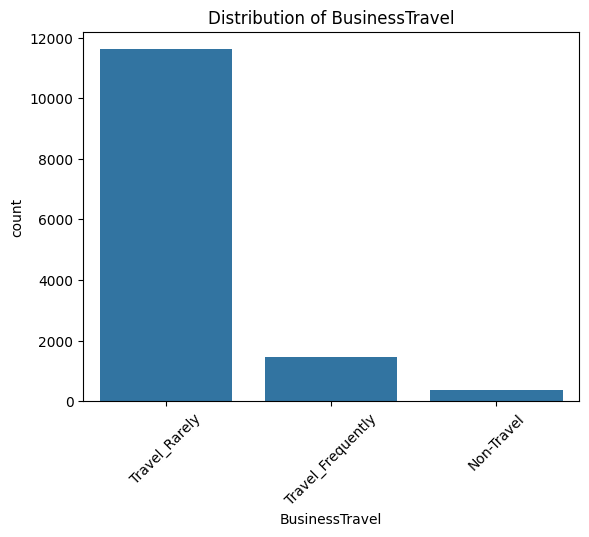

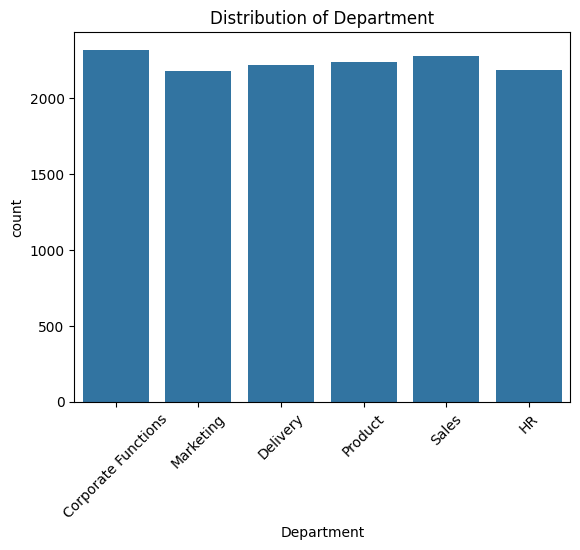

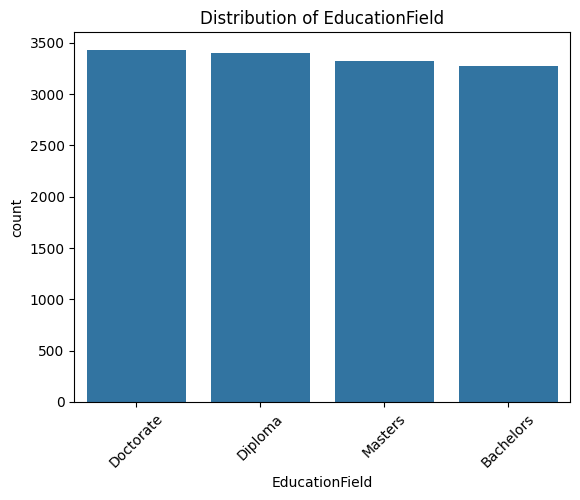

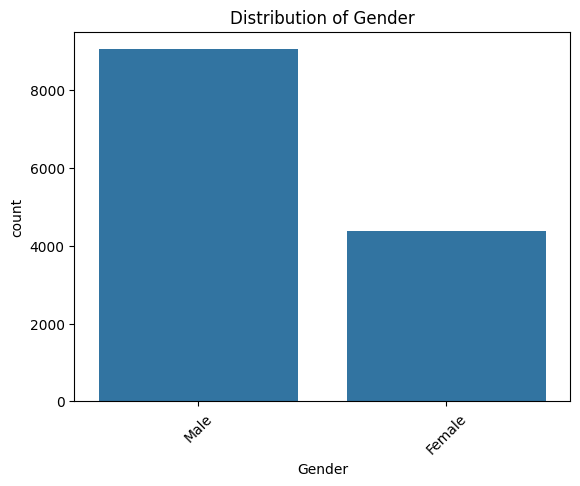

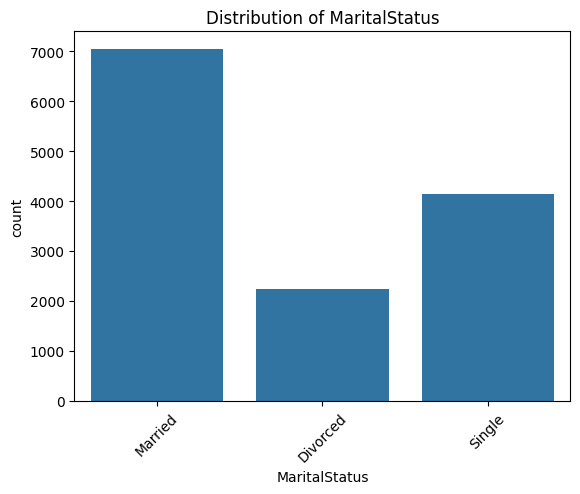

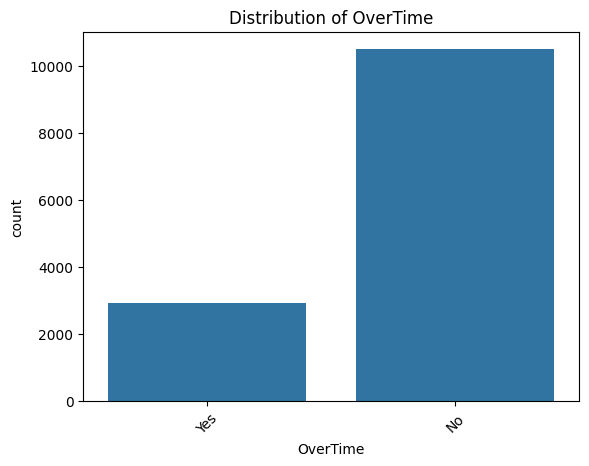

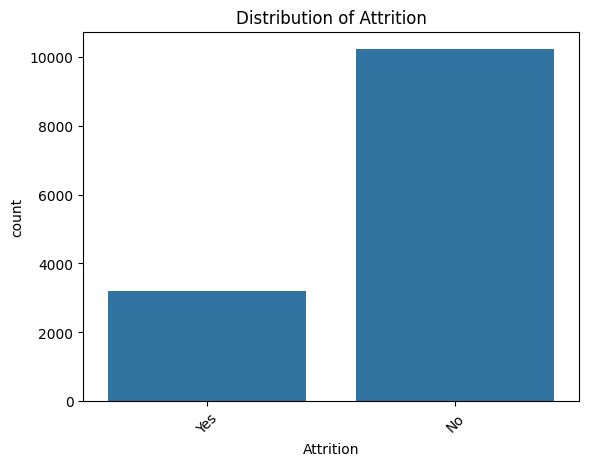

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime', 'Attrition']:
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()


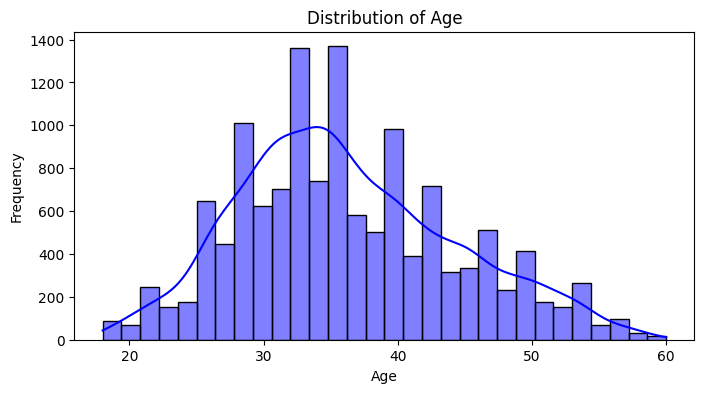

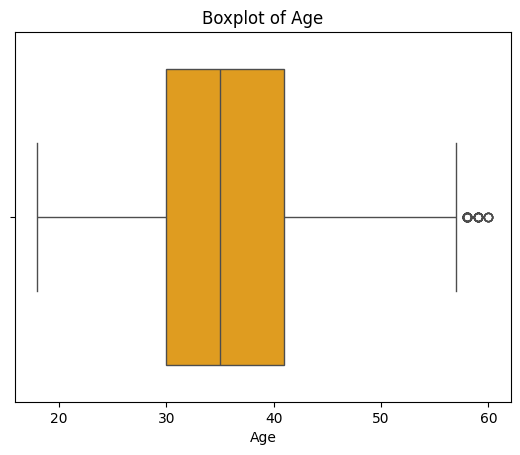

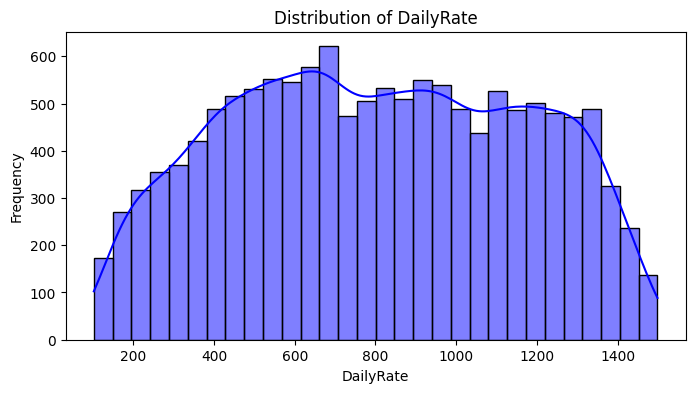

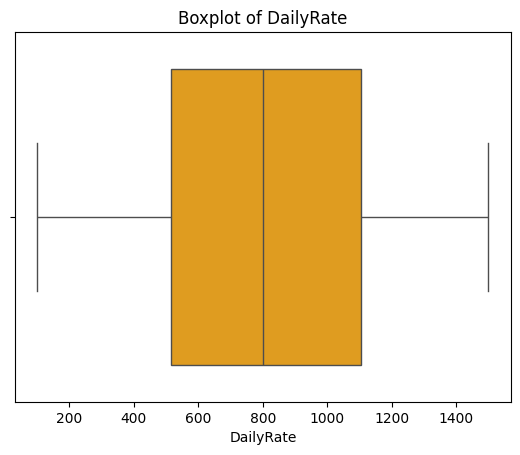

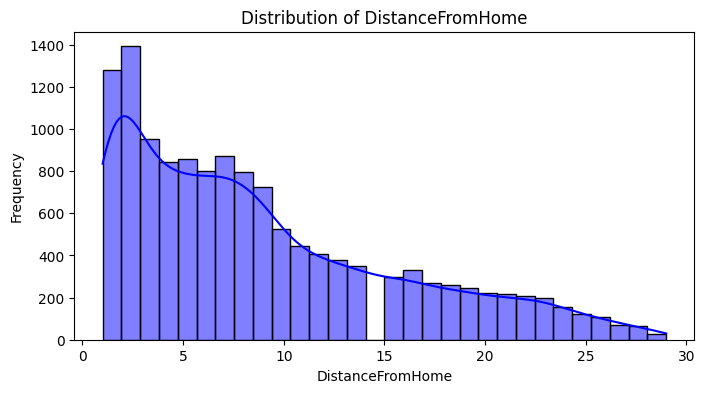

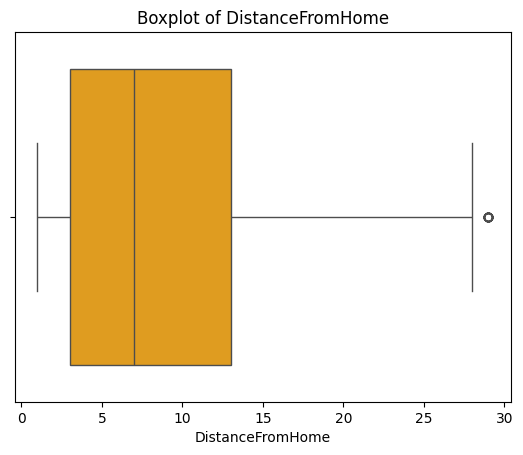

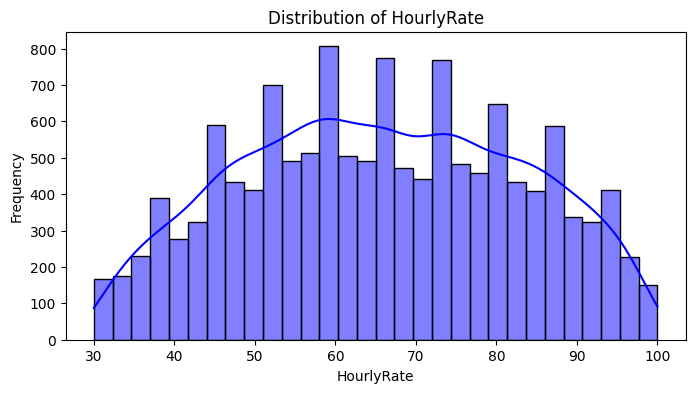

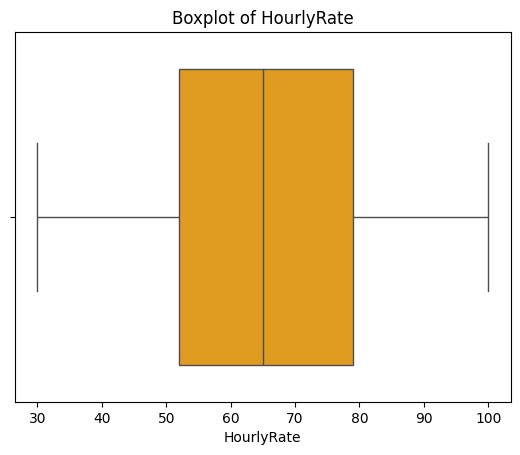

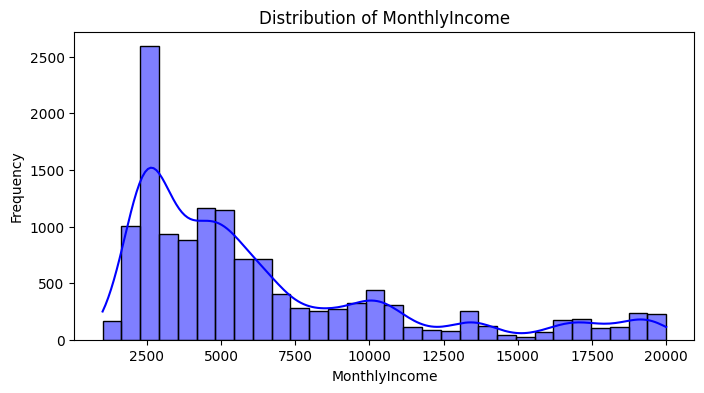

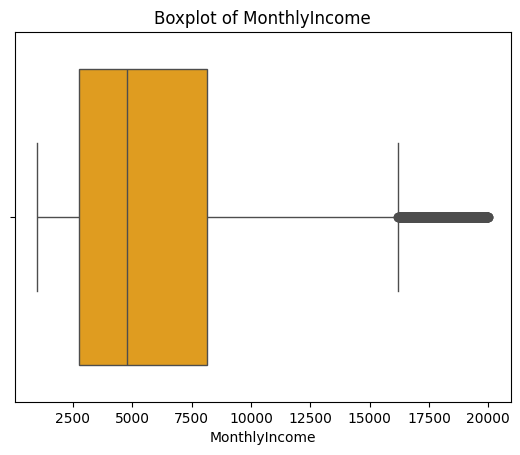

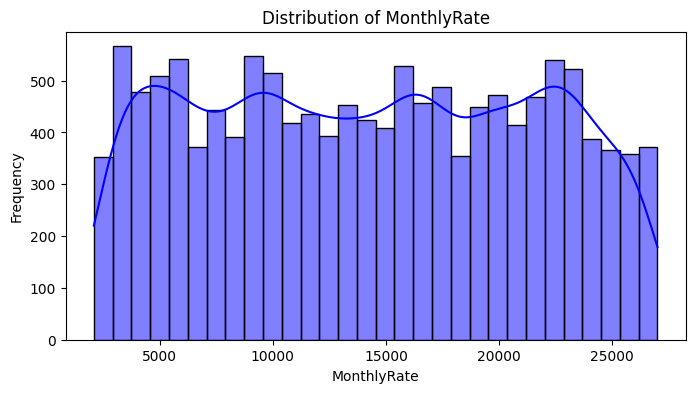

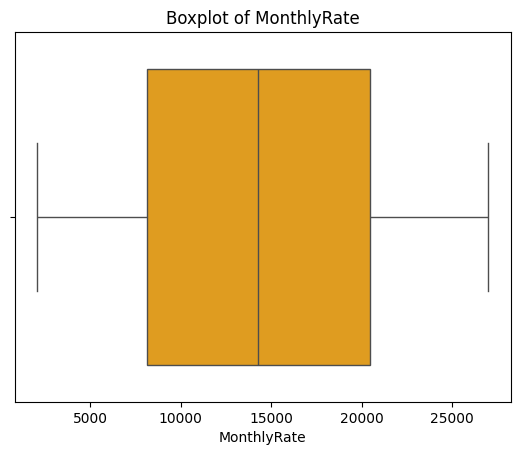

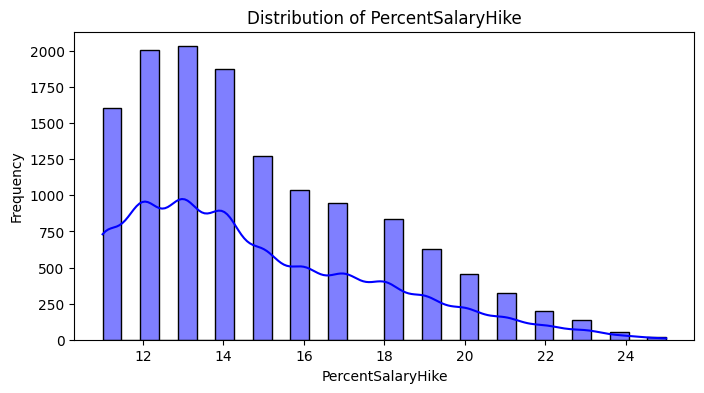

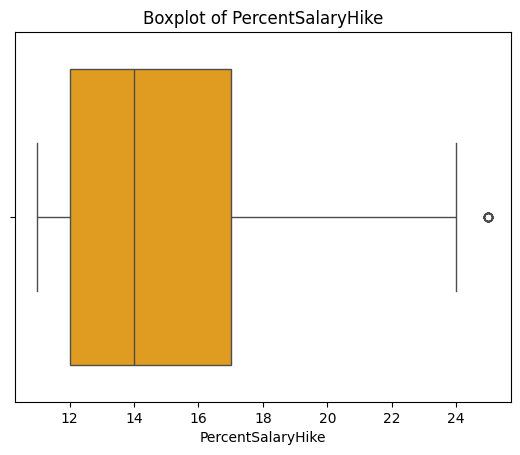

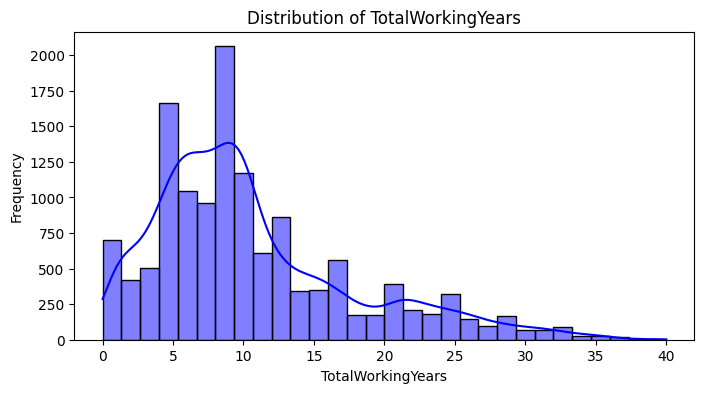

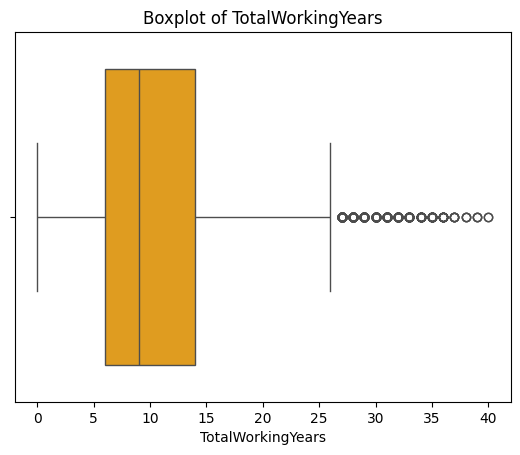

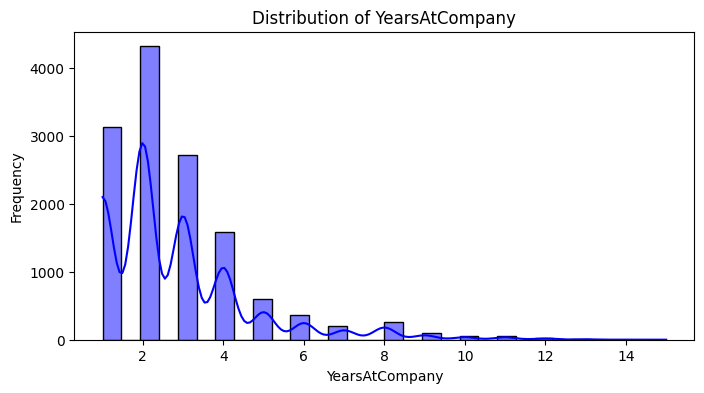

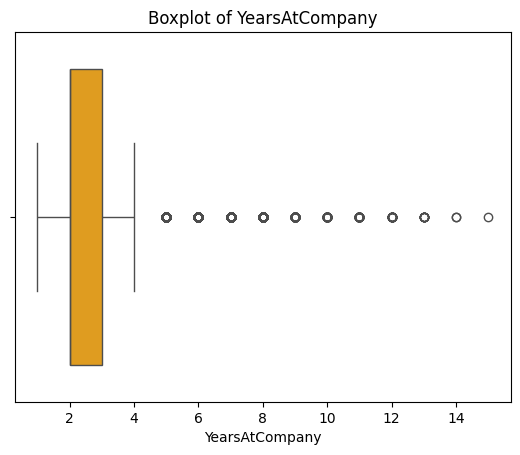

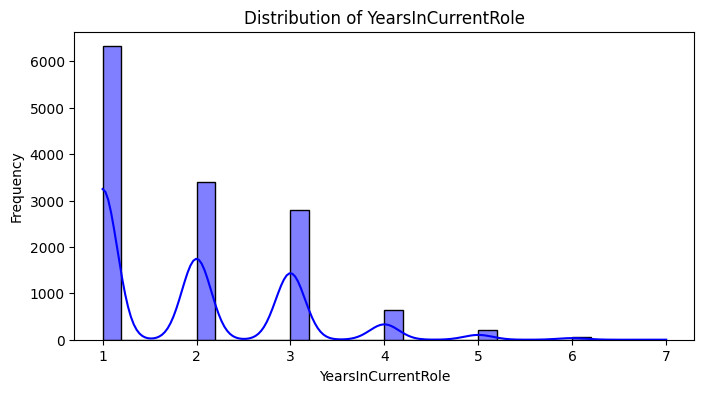

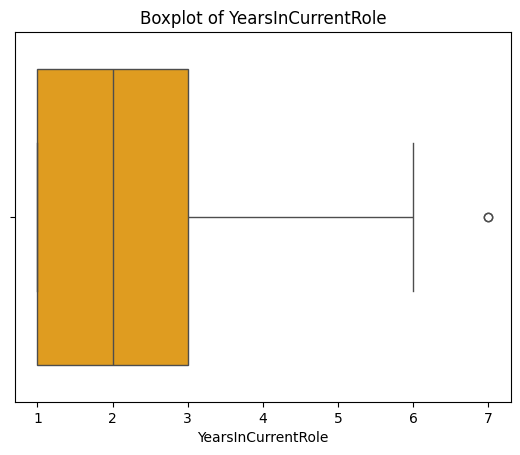

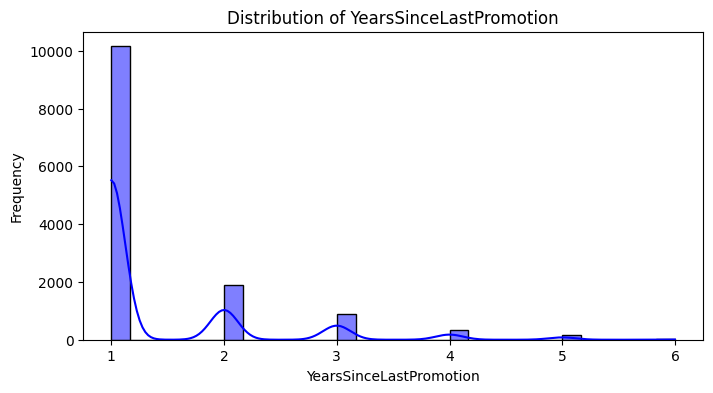

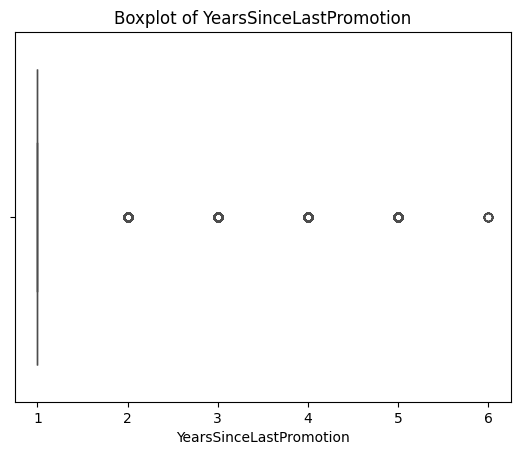

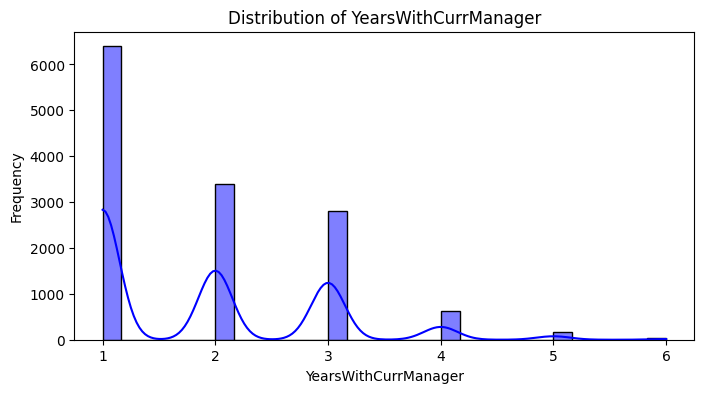

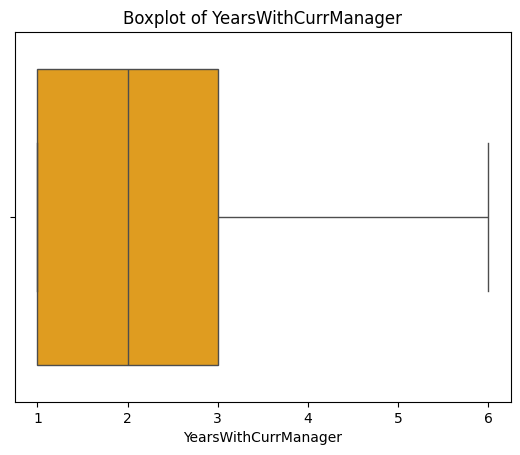

In [27]:
import numpy as np

numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                     'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike', 
                     'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Boxplot để kiểm tra giá trị ngoại lệ
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()


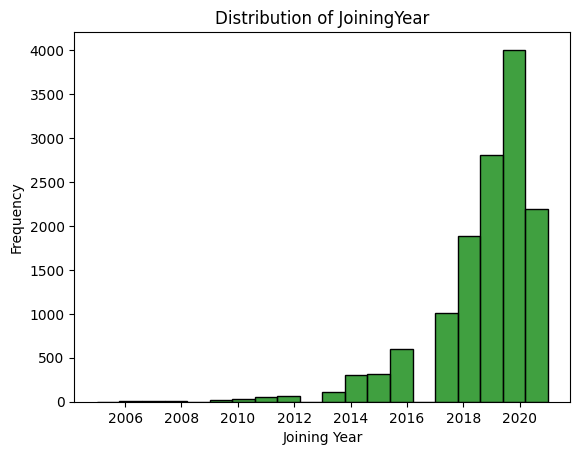

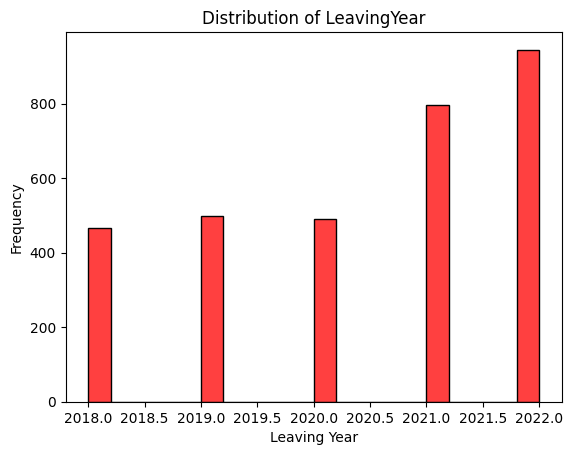

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho 'JoiningYear'
sns.histplot(df['JoiningYear'], bins=20, kde=False, color='green')
plt.title('Distribution of JoiningYear')
plt.xlabel('Joining Year')
plt.ylabel('Frequency')
plt.show()

# Kiểm tra sự tồn tại của 'LeavingYear' và vẽ biểu đồ nếu có
if 'LeavingYear' in df.columns:
    sns.histplot(df['LeavingYear'].dropna(), bins=20, kde=False, color='red')
    plt.title('Distribution of LeavingYear')
    plt.xlabel('Leaving Year')
    plt.ylabel('Frequency')
    plt.show()


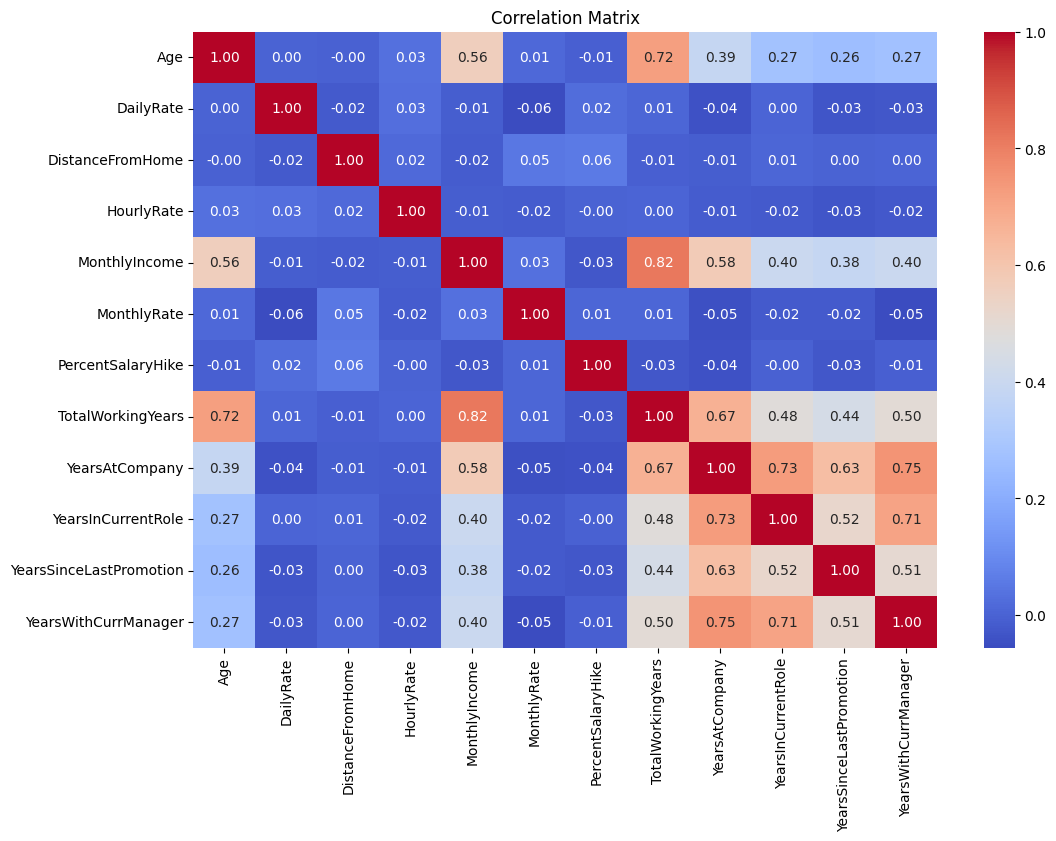

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Attrition
No     0.761752
Yes    0.238248
Name: proportion, dtype: float64


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/1665391250.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Attrition', palette='Set2')


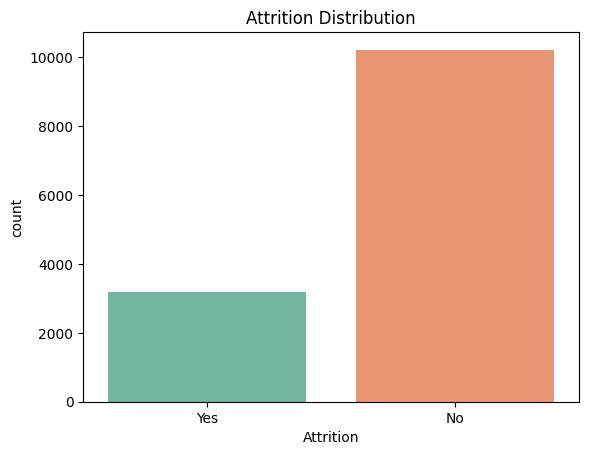

In [30]:
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(attrition_rate)

sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Attrition Distribution')
plt.show()


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


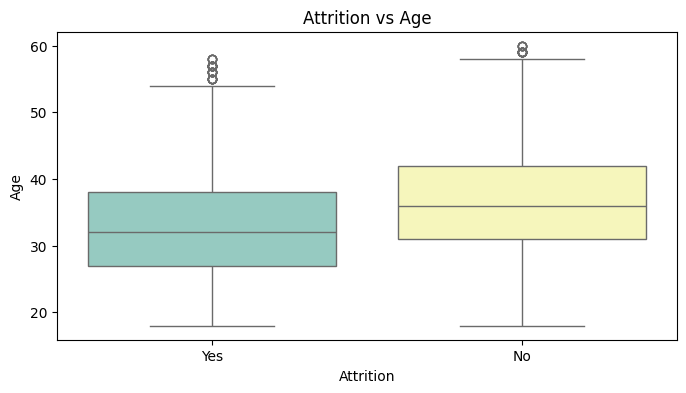

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


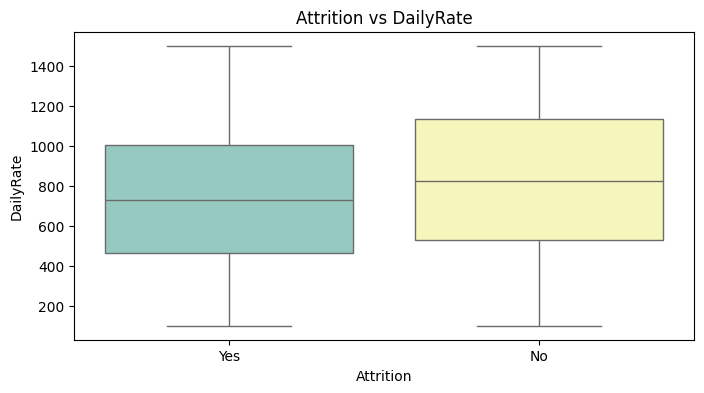

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


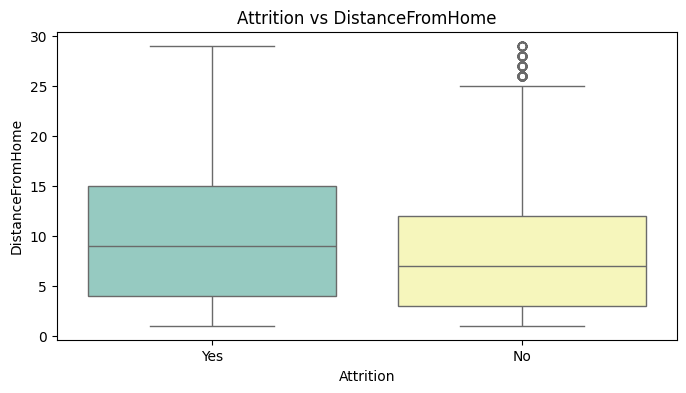

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


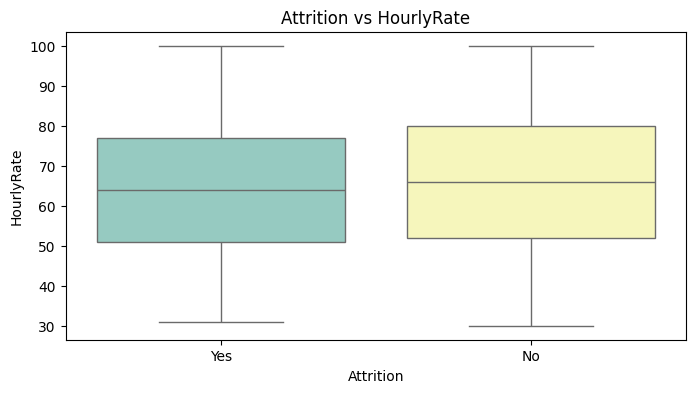

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


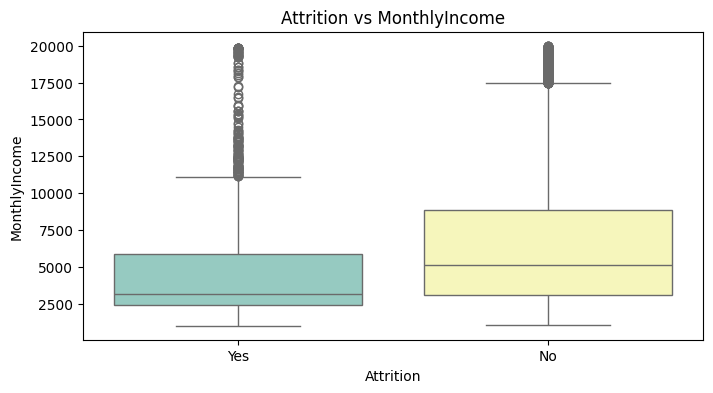

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


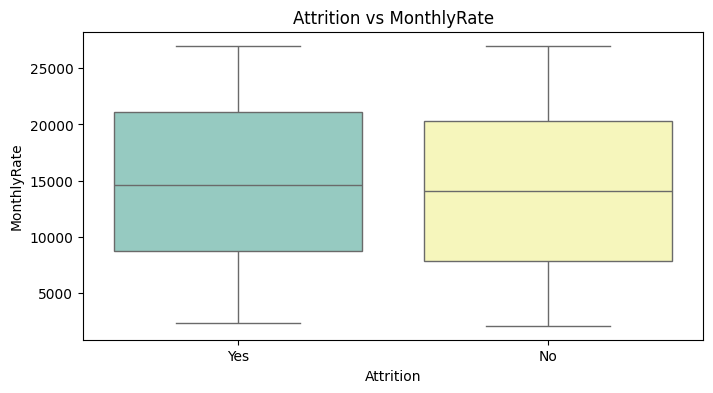

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


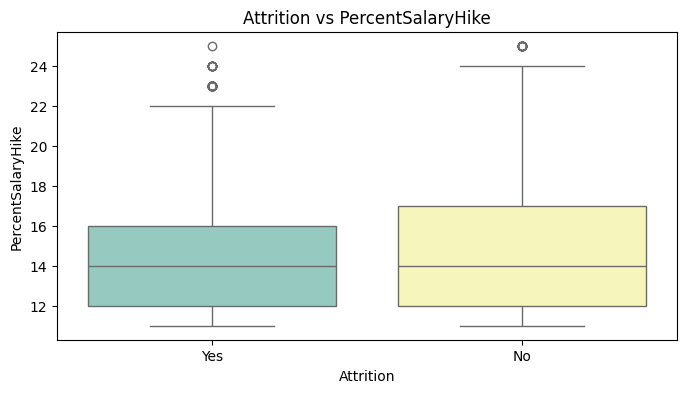

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


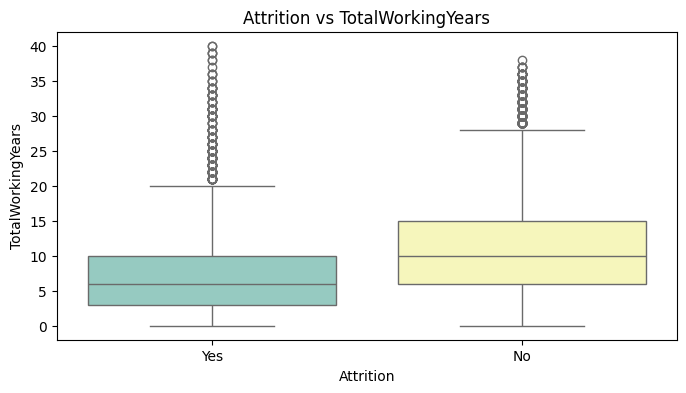

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


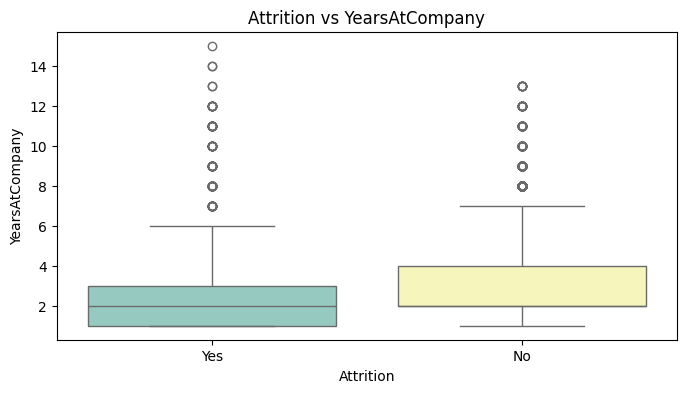

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


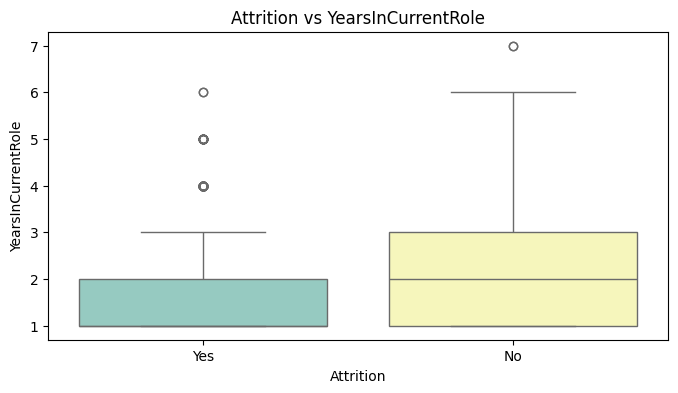

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


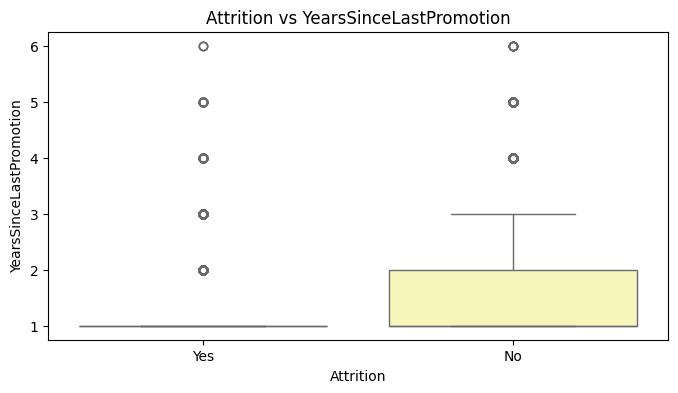

/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/137628569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')


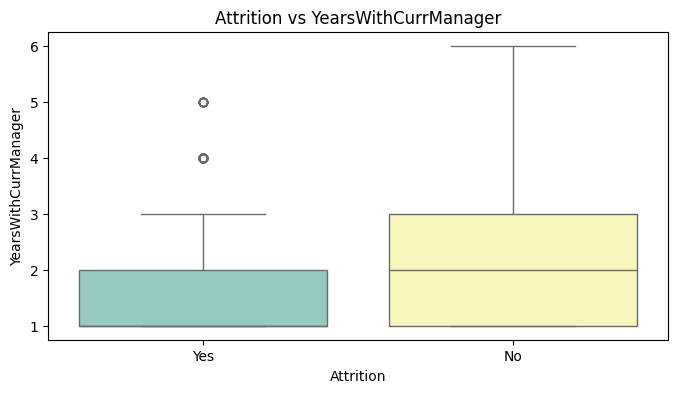

In [31]:
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Attrition', y=col, palette='Set3')
    plt.title(f'Attrition vs {col}')
    plt.show()


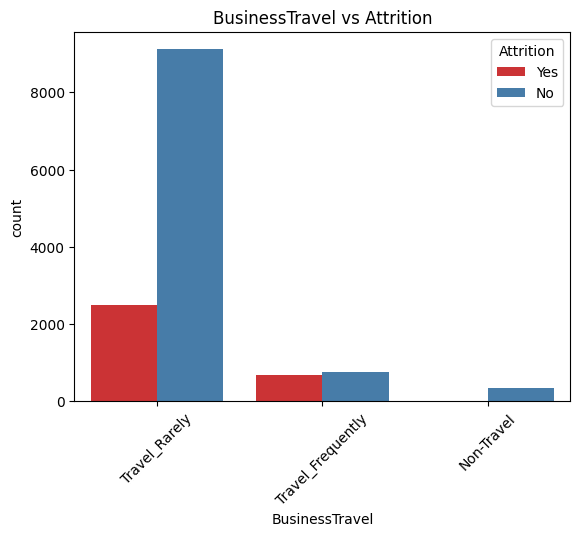

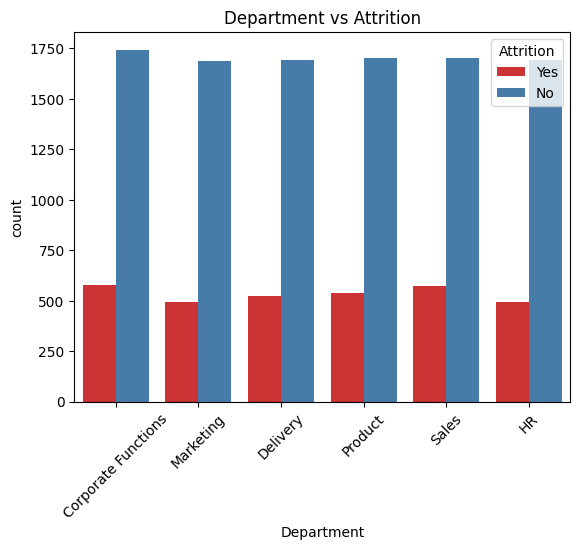

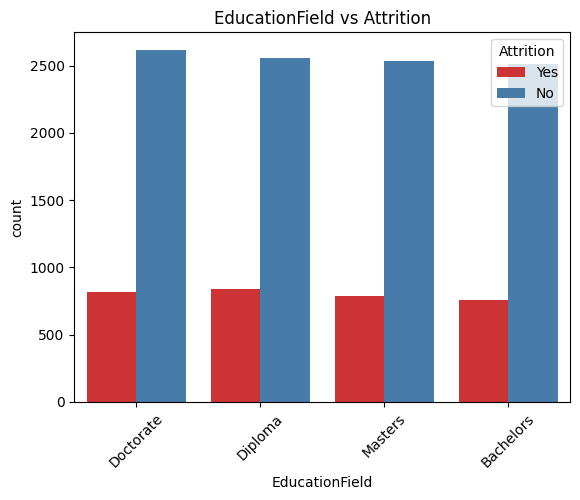

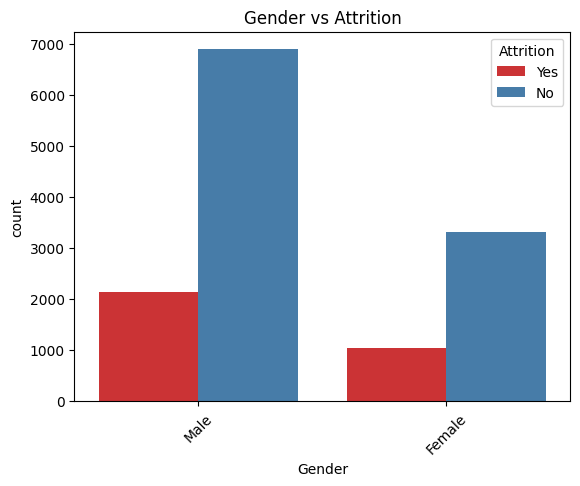

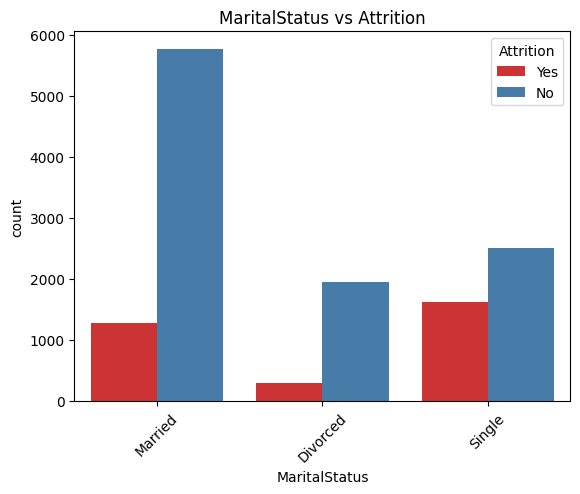

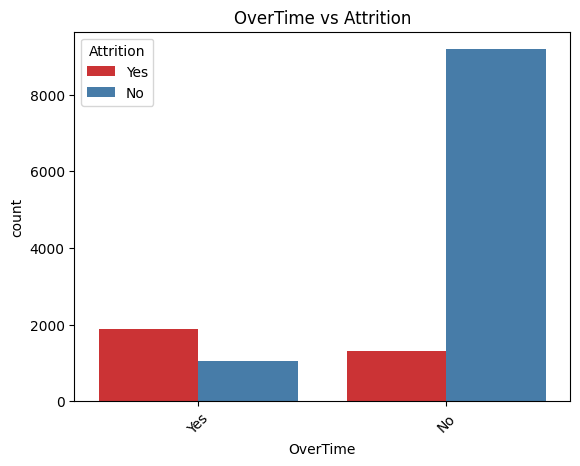

In [32]:
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 
                       'Gender', 'MaritalStatus', 'OverTime']
for col in categorical_columns:
    sns.countplot(data=df, x=col, hue='Attrition', palette='Set1')
    plt.title(f'{col} vs Attrition')
    plt.xticks(rotation=45)
    plt.show()


In [9]:
df.drop(['LeavingYear', 'Reason', 'RelievingStatus'], axis=1, inplace=True)


#Tiền xử lí dữ liệu

In [8]:
df=df.drop(['EmployeeID'],axis=1)

In [10]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60], labels=['20-30', '30-40', '40-50', '50-60'])


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'MaritalStatus', 'Over18', 'OverTime', 'office_code', 'JobLevel_updated'
]

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [12]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [13]:
bins_income = [0, 4000, 8000, 12000, 16000, float('inf')]
labels_income = ['Low', 'Medium', 'High', 'Very High', 'Ultra High']
df['Income_Group'] = pd.cut(df['MonthlyIncome'], bins=bins_income, labels=labels_income)

In [14]:
# Chỉ số hiệu suất (Performance Score)
df['Performance_Score'] = df['DailyRate'] * df['YearsAtCompany'] * df['JobLevel_updated'] * df['YearsWithCurrManager']
# Chỉ số chuyên nghiệp (Professionalism Index)
df['Professionalism_Index'] = df['DistanceFromHome'] + df['BusinessTravel'] + df['EducationField']
# Chỉ số tương tác xã hội (Social Interaction Index)
df['Social_Interaction_Index'] = df['DistanceFromHome'] + df['BusinessTravel'] + df['Department'].apply(lambda x: 1 if x in ['Sales', 'HR'] else 0)
# Chỉ số hạnh phúc (Happiness Index)
df['Happiness_Index'] = df['Age'] + df['Income_Group'].apply(lambda x: 1 if x == 'High' else 0) + df['JobLevel_updated']
#Đánh giá mức độ hài lòng trong công việc (Job Satisfaction Level)
df['JobSatisfactionLevel'] = (df['JobSatisfaction'] + df['EnvironmentSatisfaction'] + df['WorkLifeBalance']) / 3
#Sự thay đổi trong công việc (Job Change Indicator)
df['JobChangeIndicator'] = (df['YearsAtCompany'] > df['YearsInCurrentRole']).astype(int)
# Tỷ lệ tăng trưởng thu nhập (Income Growth Rate)
df['PromotionRate'] = (df['YearsSinceLastPromotion'] < 1).astype(int)

In [15]:
# Chia Professionalism_Index thành 3 khoảng: Thấp, Trung bình, Cao
bins_professionalism = [0, 5, 15, float('inf')]  # Điều chỉnh các giá trị này tùy theo phân phối dữ liệu của bạn
labels_professionalism = ['Low', 'Medium', 'High']
df['Professionalism_Index_group'] = pd.cut(df['Professionalism_Index'], bins=bins_professionalism, labels=labels_professionalism)



In [18]:
bins_performance = [0, 100000, 500000, float('inf')]
labels_performance = ['Low', 'Medium', 'High']
df['Performance_Score_group'] = pd.cut(df['Performance_Score'], bins=bins_performance, labels=labels_performance)

# Chia Professionalism_Index thành 3 khoảng: Thấp, Trung bình, Cao
bins_professionalism = [0, 5, 10, float('inf')]
labels_professionalism = ['Low', 'Medium', 'High']
df['Professionalism_Index_group'] = pd.cut(df['Professionalism_Index'], bins=bins_professionalism, labels=labels_professionalism)


# Chia Social_Interaction_Index thành 3 khoảng: Thấp, Trung bình, Cao
bins_social = [0, 5, 10, float('inf')]
labels_social = ['Low', 'Medium', 'High']
df['Social_Interaction_Index_group'] = pd.cut(df['Social_Interaction_Index'], bins=bins_social, labels=labels_social)

# Chia Happiness_Index thành 3 khoảng: Thấp, Trung bình, Cao
bins_happiness = [0, 50, 100, float('inf')]
labels_happiness = ['Low', 'Medium', 'High']
df['Happiness_Index_group'] = pd.cut(df['Happiness_Index'], bins=bins_happiness, labels=labels_happiness)



In [48]:
#DistanceFromHome
bins_distance = [0, 5, 10, 20, float('inf')]
labels_distance = ['0-5 km', '5-10 km', '10-20 km', '20+ km']
df['DistanceFromHome_group'] = pd.cut(df['DistanceFromHome'], bins=bins_distance, labels=labels_distance)
#MonthlyIncome
bins_income = [0, 4000, 8000, 12000, 16000, float('inf')]
labels_income = ['Low', 'Medium', 'High', 'Very High', 'Ultra High']
df['Income_Group'] = pd.cut(df['MonthlyIncome'], bins=bins_income, labels=labels_income)
#YearsAtCompany
bins_years_at_company = [0, 3, 5, 10, 20, float('inf')]
labels_years_at_company = ['0-3 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
df['YearsAtCompany_group'] = pd.cut(df['YearsAtCompany'], bins=bins_years_at_company, labels=labels_years_at_company)
#YearsInCurrentRole
bins_years_in_role_group = [0, 1, 3, 5, 10, float('inf')]
labels_years_in_role_group = ['0-1 year', '1-3 years', '3-5 years', '5-10 years', '10+ years']
df['YearsInCurrentRole_group'] = pd.cut(df['YearsInCurrentRole'], bins=bins_years_in_role_group, labels=labels_years_in_role_group)
#JobLevel_updated
bins_job_level_group = [0, 2, 4, 6, float('inf')]
labels_job_level_group = ['Entry', 'Mid', 'Senior', 'Executive']
df['JobLevel'] = pd.cut(df['JobLevel_updated'], bins=bins_job_level_group, labels=labels_job_level_group)
# Chia MonthlyRate thành các khoảng
bins_monthly_rate = [0, 5000, 10000, 15000, 20000, float('inf')]
labels_monthly_rate_group = ['0-5k', '5k-10k', '10k-15k', '15k-20k', '20k+']
df['MonthlyRate_group'] = pd.cut(df['MonthlyRate'], bins=bins_monthly_rate, labels=labels_monthly_rate_group)


In [112]:
# Chọn các thuộc tính liên quan đến phong độ
df_professionalism = df[['DistanceFromHome', 'BusinessTravel', 'EducationField', 'JobInvolvement', 'JobSatisfaction', 'YearsInCurrentRole', 'TrainingTimesLastYear']]

In [50]:
df.isna().sum()

JoiningYear                          0
Age                                  0
BusinessTravel                       0
DailyRate                            0
Department                           0
DistanceFromHome                     0
EducationField                       0
EmployeeCount                        0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MaritalStatus                        0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
Over18                               0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StandardHours                        0
StockOptionLevel                     0
TotalWorkingYears        

#cluster professionalism

In [114]:
# Lọc các cột liên quan
professionalism_features = ['Professionalism_Index', 'JobInvolvement', 'JobSatisfaction',
                            'YearsInCurrentRole', 'TrainingTimesLastYear', 'EducationField']

# Lọc dữ liệu và loại bỏ giá trị null nếu có
professionalism_data = df[professionalism_features].dropna()

# Mã hóa EducationField
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
professionalism_data['EducationField'] = le.fit_transform(professionalism_data['EducationField'])

# Chuẩn hóa dữ liệu
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
professionalism_scaled = scaler.fit_transform(professionalism_data)


2. Phân cụm với K-Means

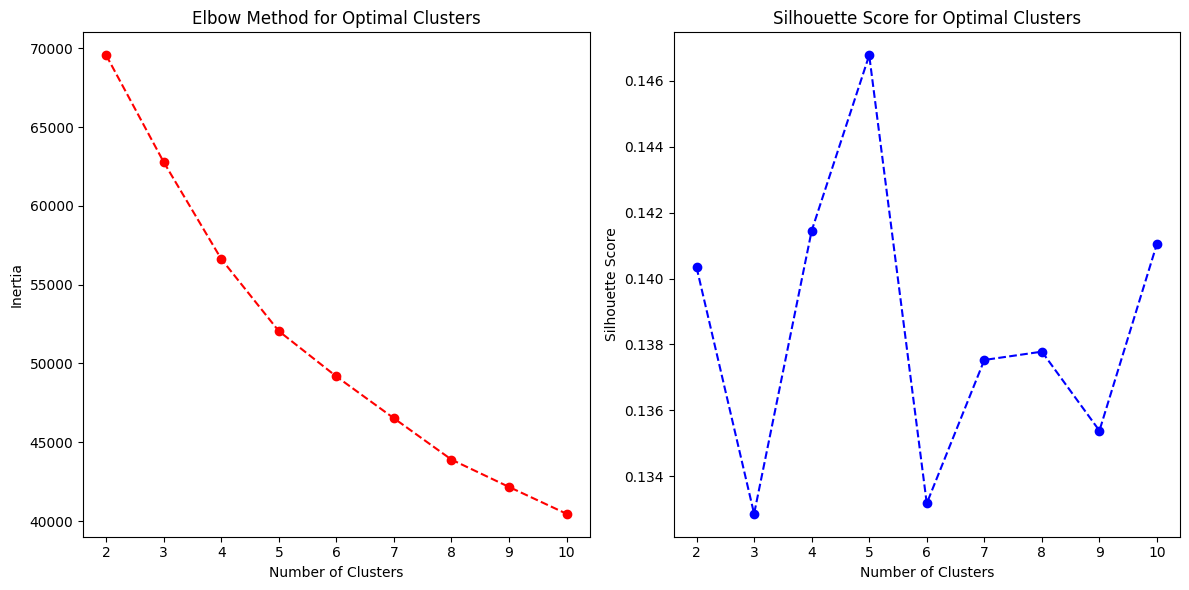

Optimal number of clusters based on Silhouette Score: 5
Optimal number of clusters based on Elbow Method: 10


In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Tìm số cụm từ 2 đến 10
range_clusters = range(2, 11)  
silhouette_scores = []
inertia_values = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(professionalism_scaled)
    
    # Tính silhouette score
    silhouette_avg = silhouette_score(professionalism_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Tính inertia (sum of squared distances)
    inertia_values.append(kmeans.inertia_)

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(12, 6))

# Biểu đồ Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range_clusters, inertia_values, marker='o', linestyle='--', color='r')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Biểu đồ Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_clusters, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Số cụm tối ưu từ phương pháp Silhouette
optimal_k_silhouette = range_clusters[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_k_silhouette}")

# Số cụm tối ưu từ phương pháp Elbow (dựa trên sự giảm mạnh của inertia)
optimal_k_elbow = range_clusters[inertia_values.index(min(inertia_values))]
print(f"Optimal number of clusters based on Elbow Method: {optimal_k_elbow}")


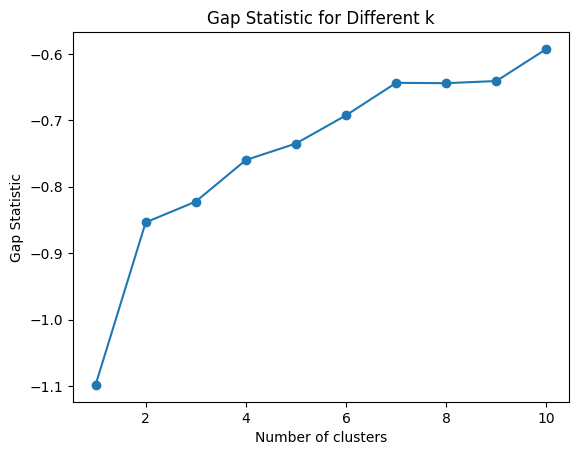

In [104]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

def gap_statistic(X, k_max):
    gap_values = []
    for k in range(1, k_max+1):
        # Fit model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        # Tính toán tổng khoảng cách trong cụm
        total_dispersion = np.sum(pairwise_distances(X, kmeans.cluster_centers_, metric='euclidean') ** 2)
        
        # Tạo dữ liệu ngẫu nhiên và tính toán tổng khoảng cách cho dữ liệu ngẫu nhiên
        random_data = np.random.rand(*X.shape)
        random_dispersion = np.sum(pairwise_distances(random_data, kmeans.cluster_centers_, metric='euclidean') ** 2)
        
        gap = np.log(random_dispersion) - np.log(total_dispersion)
        gap_values.append(gap)
    
    return gap_values

gap_values = gap_statistic(professionalism_scaled, 10)

plt.plot(range(1, 11), gap_values, marker='o')
plt.title('Gap Statistic for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.show()


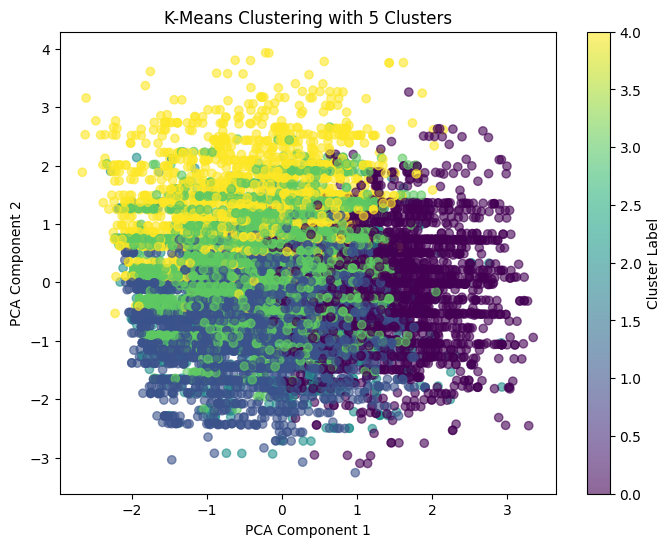

In [109]:
optimal_k=5
kmeans = KMeans(n_clusters=optimal_k,init='k-means++',max_iter=300, n_init=10 ,random_state=42)
professionalism_data['KMeans_Cluster'] = kmeans.fit_predict(professionalism_scaled)

# Trực quan hóa kết quả bằng PCA
from sklearn.decomposition import PCA

# Giảm số chiều dữ liệu để trực quan hóa
pca = PCA(n_components=2)
pca_data = pca.fit_transform(professionalism_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=professionalism_data['KMeans_Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Chạy mô hình Hierarchical Clustering

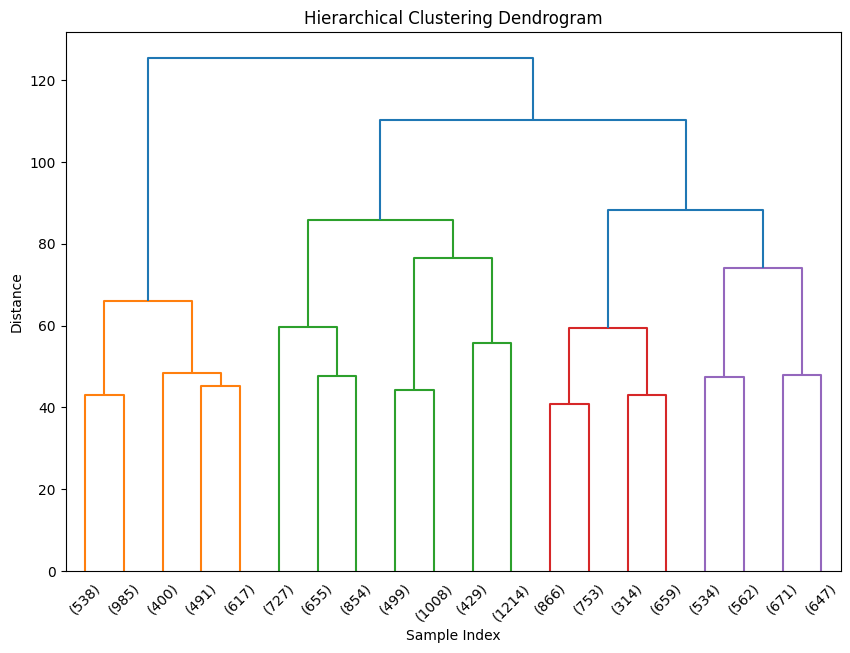

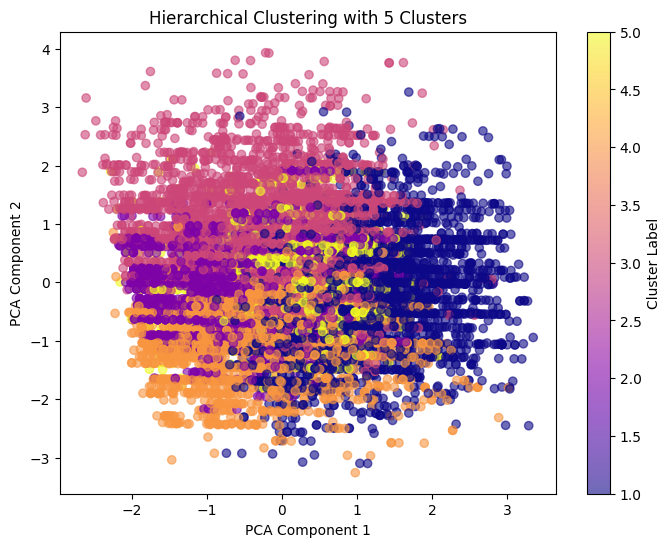

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Tạo ma trận liên kết
linkage_matrix = linkage(professionalism_scaled, method='ward')

# Vẽ sơ đồ Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Chia cụm dựa trên số cụm tối ưu từ Silhouette
hierarchical_clusters = fcluster(linkage_matrix, t=optimal_k, criterion='maxclust')
professionalism_data['Hierarchical_Cluster'] = hierarchical_clusters

# Trực quan hóa PCA cho Hierarchical
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=professionalism_data['Hierarchical_Cluster'], cmap='plasma', marker='o', alpha=0.6)
plt.title(f'Hierarchical Clustering with {optimal_k} Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


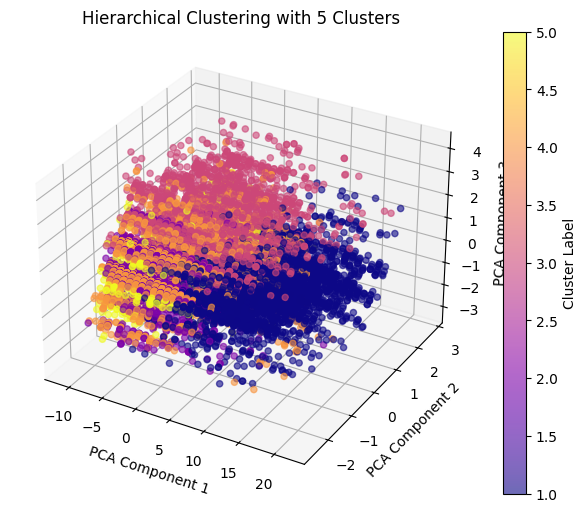

In [57]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Giả sử bạn đã thực hiện phân cụm Hierarchical và lưu kết quả trong 'professionalism_data['Hierarchical_Cluster']'
# Và đã có dữ liệu cần giảm chiều, trong trường hợp này là 'professionalism_data' hoặc dữ liệu cần giảm chiều của bạn

# Tiến hành giảm chiều với PCA xuống 3 chiều
pca = PCA(n_components=3)  # Giảm xuống 3 chiều
pca_data = pca.fit_transform(professionalism_data[['Professionalism_Index', 'JobInvolvement', 'JobSatisfaction', 
                                                     'YearsInCurrentRole', 'TrainingTimesLastYear', 'EducationField']])

# Tạo đồ thị 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm phân tán 3D
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=professionalism_data['Hierarchical_Cluster'], cmap='plasma', marker='o', alpha=0.6)

# Thêm tiêu đề và nhãn trục
ax.set_title(f'Hierarchical Clustering with {optimal_k} Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Thêm colorbar để phân biệt các cụm
plt.colorbar(scatter, label='Cluster Label')

# Hiển thị đồ thị
plt.show()


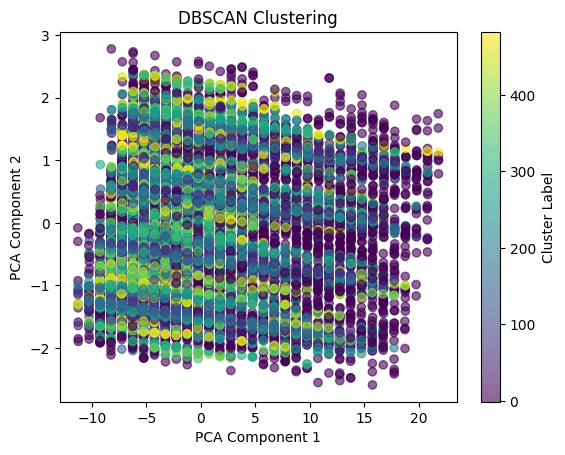

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE

# Áp dụng DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
professionalism_data['DBSCAN_Cluster'] = dbscan.fit_predict(professionalism_scaled)

# Trực quan hóa DBSCAN
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=professionalism_data['DBSCAN_Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


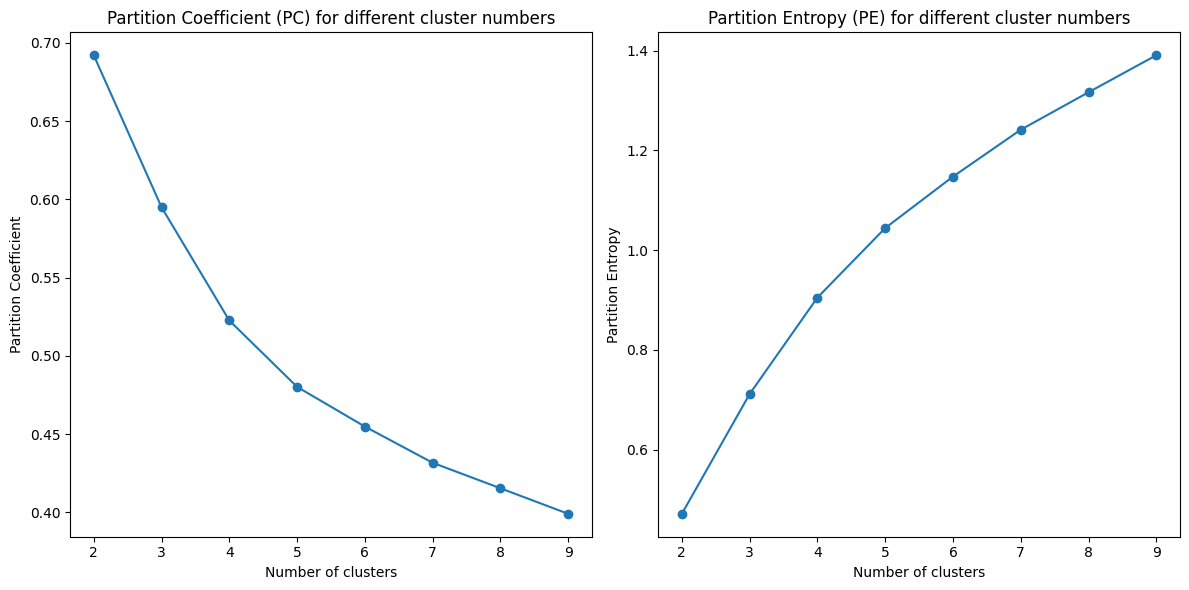

Số cụm tối ưu theo Partition Coefficient là: 2


In [136]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
import matplotlib.pyplot as plt
import numpy as np



# Giảm chiều dữ liệu với PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(professionalism_scaled)

# Tính toán Partition Coefficient (PC) và Partition Entropy (PE) cho các số cụm khác nhau
n_clusters_range = range(2, 10)  # Kiểm tra với các số cụm từ 2 đến 9
partition_coefficients = []
partition_entropies = []

for n_clusters in n_clusters_range:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(data_pca)
    
    # Partition Coefficient
    pc = np.mean(np.sum(fcm.u ** 2, axis=1))
    partition_coefficients.append(pc)
    
    # Partition Entropy
    pe = -np.sum(fcm.u * np.log(fcm.u + 1e-10)) / data_pca.shape[0]
    partition_entropies.append(pe)

# Vẽ biểu đồ Partition Coefficient và Partition Entropy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, partition_coefficients, marker='o')
plt.title('Partition Coefficient (PC) for different cluster numbers')
plt.xlabel('Number of clusters')
plt.ylabel('Partition Coefficient')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, partition_entropies, marker='o')
plt.title('Partition Entropy (PE) for different cluster numbers')
plt.xlabel('Number of clusters')
plt.ylabel('Partition Entropy')

plt.tight_layout()
plt.show()

# Chọn số cụm tối ưu dựa trên các chỉ số
optimal_clusters = n_clusters_range[np.argmax(partition_coefficients)]
print(f"Số cụm tối ưu theo Partition Coefficient là: {optimal_clusters}")


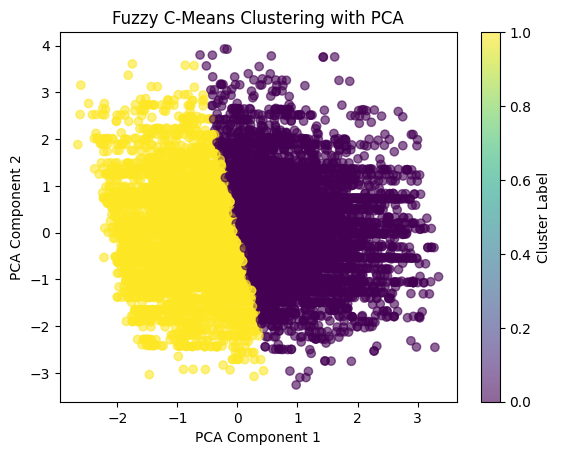

In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM  # Thư viện Fuzzy C-Means
import matplotlib.pyplot as plt


np.random.seed(42)
# Giảm chiều dữ liệu với PCA
pca = PCA(n_components=2)  # Giảm chiều dữ liệu xuống 2 chiều
data_pca = pca.fit_transform(professionalism_scaled)

# Phân cụm mờ với Fuzzy C-Means
fcm = FCM(n_clusters=2, random_state=42)
fcm.fit(data_pca)
# Lấy giá trị mức độ thuộc về cụm
membership = fcm.u  # U là ma trận mức độ thuộc về mỗi cụm

# Dự đoán các cụm
labels = fcm.predict(data_pca)

# Thêm kết quả phân cụm vào DataFrame
professionalism_data['Fuzzy_Cluster'] = labels

# Trực quan hóa kết quả phân cụm mờ
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6)
plt.title('Fuzzy C-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



In [116]:
# Các chỉ số của các cụm
# Trung tâm các cụm
centers = fcm.centers
print(f"Trung tâm các cụm:\n{centers}")

# Mức độ thuộc về các cụm
print(f"\nMức độ thuộc về các cụm (U):\n{membership}")


Trung tâm các cụm:
[[ 0.01949698  1.00960614]
 [-0.9138458  -0.48368231]
 [ 0.98040657 -0.407294  ]]

Mức độ thuộc về các cụm (U):
[[0.27440273 0.1110165  0.61458077]
 [0.12038076 0.06377104 0.8158482 ]
 [0.77605393 0.13502032 0.08892575]
 ...
 [0.06460676 0.8916809  0.04371234]
 [0.07017377 0.85491387 0.07491236]
 [0.75764801 0.07576046 0.16659153]]


In [117]:
# Kiểm tra số lượng các cụm được phân loại
print(f"Số lượng các cụm duy nhất: {len(pd.unique(professionalism_data['Fuzzy_Cluster']))}")

# Xem lại các mức độ thuộc về cụm (membership)
print(f"Mức độ thuộc về cụm (u): {membership[:5]}")  # In ra 5 dòng đầu tiên của ma trận membership


Số lượng các cụm duy nhất: 3
Mức độ thuộc về cụm (u): [[0.27440273 0.1110165  0.61458077]
 [0.12038076 0.06377104 0.8158482 ]
 [0.77605393 0.13502032 0.08892575]
 [0.71399718 0.0796851  0.20631771]
 [0.04001319 0.91024116 0.04974564]]


In [138]:
from sklearn.metrics import silhouette_score

# Tính silhouette score cho các cụm
sil_score = silhouette_score(professionalism_data.drop(columns=['Fuzzy_Cluster']), professionalism_data['Fuzzy_Cluster'])
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.226164353848351


In [139]:
from sklearn.cluster import KMeans

# Sử dụng KMeans để tính WCSS
kmeans = KMeans(n_clusters=4)
kmeans.fit(professionalism_data.drop(columns=['Fuzzy_Cluster']))

# WCSS
wcss = kmeans.inertia_
print(f"WCSS: {wcss}")


WCSS: 113335.66641679543


In [137]:
from sklearn.metrics import davies_bouldin_score

# Tính Davies-Bouldin index
db_index = davies_bouldin_score(professionalism_data.drop(columns=['Fuzzy_Cluster']), professionalism_data['Fuzzy_Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.3136651705063938


In [95]:
# Tạo từ điển để lưu dữ liệu của từng cụm
clusters_dict = {}

for cluster_id in range(2):  # 4 là số cụm bạn đã chọn
    # Lọc dữ liệu của từng cụm
    cluster_data = professionalism_data[professionalism_data['Fuzzy_Cluster'] == cluster_id]
    
    # Lưu vào từ điển với tên cụm là khóa
    clusters_dict[f"Cluster_{cluster_id + 1}"] = cluster_data

# Kiểm tra dữ liệu của từng cụm đã được lưu vào từ điển
for cluster_name, cluster_data in clusters_dict.items():
    print(f"{cluster_name} dữ liệu:")
    print(cluster_data.head())  # In ra 5 dòng đầu tiên của mỗi cụm
    print("\n")


Cluster_1 dữ liệu:
   Professionalism_Index  JobInvolvement  JobSatisfaction  YearsInCurrentRole  \
0                     26               3                3                   4   
1                     23               3                2                   4   
3                     22               2                4                   4   
5                     26               2                3                   4   
8                     26               3                4                   4   

   TrainingTimesLastYear  EducationField  Fuzzy_Cluster  
0                      2               2              0  
1                      2               2              0  
3                      3               1              0  
5                      2               3              0  
8                      3               1              0  


Cluster_2 dữ liệu:
    Professionalism_Index  JobInvolvement  JobSatisfaction  \
2                       6               2                4   
4

In [96]:
import pandas as pd

# Tạo DataFrame chứa các chỉ số đặc trưng cho từng cụm
statistics_dict = {}

for cluster_name, cluster_data in clusters_dict.items():
    # Tính các chỉ số đặc trưng
    stats = cluster_data.describe().transpose()  # Chuyển hướng bảng để dễ đọc
    stats['Cluster'] = cluster_name  # Thêm cột Cluster để phân biệt các cụm
    statistics_dict[cluster_name] = stats

# Kết hợp tất cả các chỉ số vào một DataFrame
all_statistics = pd.concat(statistics_dict.values())

# In kết quả dưới dạng DataFrame
all_statistics


count       mean       std  min   25%   50%   75%  \
Professionalism_Index  6584.0  16.223420  6.946578  4.0  11.0  15.0  22.0   
JobInvolvement         6584.0   2.486938  0.656923  1.0   2.0   3.0   3.0   
JobSatisfaction        6584.0   2.394137  0.968297  1.0   2.0   2.0   3.0   
YearsInCurrentRole     6584.0   1.914793  1.033923  1.0   1.0   2.0   3.0   
TrainingTimesLastYear  6584.0   2.416160  1.053175  0.0   2.0   2.0   3.0   
EducationField         6584.0   2.283870  0.854477  0.0   2.0   3.0   3.0   
Fuzzy_Cluster          6584.0   0.000000  0.000000  0.0   0.0   0.0   0.0   
Professionalism_Index  6839.0   8.377541  4.212011  1.0   5.0   7.0  11.0   
JobInvolvement         6839.0   2.440269  0.662953  1.0   2.0   2.0   3.0   
JobSatisfaction        6839.0   2.382512  0.944601  1.0   2.0   2.0   3.0   
YearsInCurrentRole     6839.0   1.883755  1.044392  1.0   1.0   2.0   3.0   
TrainingTimesLastYear  6839.0   2.491446  1.084015  0.0   2.0   2.0   3.0   
EducationField         6839.0   0.758590  0.757958  0.0   0.0   1.0   1.0   
Fuzzy_Cluster          6839.0   1.000000  0.000000  1.0   1.0   1.0   1.0   

                        max    Cluster  
Professionalism_Index  34.0  Cluster_1  
JobInvolvement          4.0  Cluster_1  
JobSatisfaction         4.0  Cluster_1  
YearsInCurrentRole      7.0  Cluster_1  
TrainingTimesLastYear   6.0  Cluster_1  
EducationField          3.0  Cluster_1  
Fuzzy_Cluster           0.0  Cluster_1  
Professionalism_Index  24.0  Cluster_2  
JobInvolvement          4.0  Cluster_2  
JobSatisfaction         4.0  Cluster_2  
YearsInCurrentRole      7.0  Cluster_2  
TrainingTimesLastYear   6.0  Cluster_2  
EducationField          3.0  Cluster_2  
Fuzzy_Cluster           1.0  Cluster_2

In [ ]:
future_potential_data = df[['YearsSinceLastPromotion', 'Performance_Score', 'EducationField', 
                                              'TrainingTimesLastYear', 'JobLevel_updated', 'YearsInCurrentRole']]


In [ ]:
# Trung bình giá trị cho từng cụm từ K-Means
kmeans_summary = professionalism_data.groupby('KMeans_Cluster').mean()

# Trung bình giá trị cho từng cụm từ Hierarchical
hierarchical_summary = professionalism_data.groupby('Hierarchical_Cluster').mean()

In [60]:
kmeans_summary

Professionalism_Index  JobInvolvement  JobSatisfaction  \
KMeans_Cluster                                                           
0                           23.824289        2.441430         2.356158   
1                            9.375401        1.786943         2.368697   
2                            9.922052        2.487270         2.405014   
3                            9.643626        3.056091         2.371955   
4                           10.868935        2.599244         2.486452   

                YearsInCurrentRole  TrainingTimesLastYear  EducationField  \
KMeans_Cluster                                                              
0                         1.827304               2.205857        1.829457   
1                         1.392888               2.184203        1.444477   
2                         3.448492               2.176655        1.419115   
3                         1.373654               2.176771        1.430595   
4                         1.773787               4.467549        1.479521   

                Hierarchical_Cluster  DBSCAN_Cluster  
KMeans_Cluster                                        
0                           1.312231      111.326443  
1                           3.847275      160.635383  
2                           3.727771       69.242460  
3                           2.468272      181.889802  
4                           3.096408      175.180844

In [61]:
hierarchical_summary

Professionalism_Index  JobInvolvement  JobSatisfaction  \
Hierarchical_Cluster                                                           
1                                 21.730452        2.444738         2.300231   
2                                  8.538462        2.856440         2.568873   
3                                 10.804762        2.908254         2.318095   
4                                  9.091821        1.832562         1.801698   
5                                  8.927506        2.218310         3.052610   

                      YearsInCurrentRole  TrainingTimesLastYear  \
Hierarchical_Cluster                                              
1                               1.997691               2.115473   
2                               1.395349               1.959302   
3                               1.766032               3.442222   
4                               1.672454               2.292438   
5                               2.658244               2.224109   

                      EducationField  KMeans_Cluster  DBSCAN_Cluster  
Hierarchical_Cluster                                                  
1                           1.627186        0.678984      105.914220  
2                           0.854204        2.666369      174.936047  
3                           1.699365        3.141270      175.790159  
4                           1.393133        1.326389      139.494985  
5                           1.830572        1.707539      115.578293

Kmodes

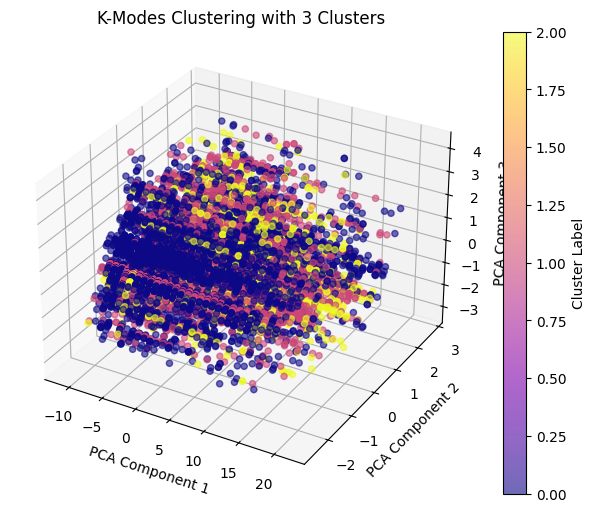

In [70]:
from kmodes.kmodes import KModes
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Giả sử 'professionalism_data' là DataFrame của bạn với các cột 'Professionalism_Index', 'JobInvolvement', v.v.
# Thực hiện phân cụm với K-Modes
# Đảm bảo dữ liệu là dữ liệu phân loại, nếu có dữ liệu số, hãy mã hóa trước

# Khởi tạo K-Modes với số cụm tối ưu
optimal_k = 3  # Số cụm bạn muốn, có thể thay đổi tùy theo kết quả tìm được

kmode = KModes(n_clusters=optimal_k, init='Huang', random_state=42)
professionalism_data['KModes_Cluster'] = kmode.fit_predict(professionalism_data[['Professionalism_Index', 'JobInvolvement', 
                                                                                 'JobSatisfaction', 'YearsInCurrentRole', 
                                                                                 'TrainingTimesLastYear', 'EducationField']])

# Tiến hành giảm chiều với PCA xuống 3 chiều
pca = PCA(n_components=3)  # Giảm xuống 3 chiều
pca_data = pca.fit_transform(professionalism_data[['Professionalism_Index', 'JobInvolvement', 'JobSatisfaction', 
                                                     'YearsInCurrentRole', 'TrainingTimesLastYear', 'EducationField']])

# Tạo đồ thị 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm phân tán 3D
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=professionalism_data['KModes_Cluster'], 
                     cmap='plasma', marker='o', alpha=0.6)

# Thêm tiêu đề và nhãn trục
ax.set_title(f'K-Modes Clustering with {optimal_k} Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Thêm colorbar để phân biệt các cụm
plt.colorbar(scatter, label='Cluster Label')

# Hiển thị đồ thị
plt.show()


Bộ 2: Tương lai tiềm năng (Future Potential Cluster)


In [30]:
future_potential_data = df[['YearsSinceLastPromotion', 'Performance_Score', 'EducationField', 
                                              'TrainingTimesLastYear', 'JobLevel_updated', 'YearsInCurrentRole']]


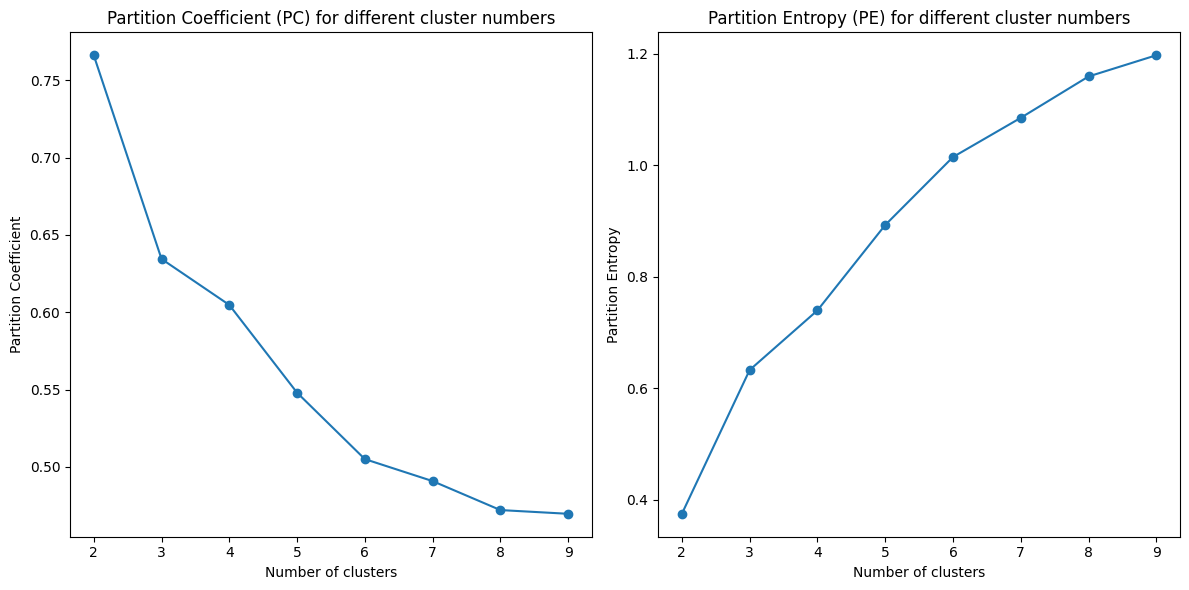

Số cụm tối ưu theo Partition Coefficient là: 2


In [73]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM
import matplotlib.pyplot as plt
import numpy as np

# Tiền xử lý dữ liệu
scaler = StandardScaler()
future_potential_data_scaled = scaler.fit_transform(future_potential_data)

# Giảm chiều dữ liệu với PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(future_potential_data_scaled)

# Tính toán Partition Coefficient (PC) và Partition Entropy (PE) cho các số cụm khác nhau
n_clusters_range = range(2, 10)  # Kiểm tra với các số cụm từ 2 đến 9
partition_coefficients = []
partition_entropies = []

for n_clusters in n_clusters_range:
    fcm = FCM(n_clusters=n_clusters)
    fcm.fit(data_pca)
    
    # Partition Coefficient
    pc = np.mean(np.sum(fcm.u ** 2, axis=1))
    partition_coefficients.append(pc)
    
    # Partition Entropy
    pe = -np.sum(fcm.u * np.log(fcm.u + 1e-10)) / data_pca.shape[0]
    partition_entropies.append(pe)

# Vẽ biểu đồ Partition Coefficient và Partition Entropy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, partition_coefficients, marker='o')
plt.title('Partition Coefficient (PC) for different cluster numbers')
plt.xlabel('Number of clusters')
plt.ylabel('Partition Coefficient')

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, partition_entropies, marker='o')
plt.title('Partition Entropy (PE) for different cluster numbers')
plt.xlabel('Number of clusters')
plt.ylabel('Partition Entropy')

plt.tight_layout()
plt.show()

# Chọn số cụm tối ưu dựa trên các chỉ số
optimal_clusters = n_clusters_range[np.argmax(partition_coefficients)]
print(f"Số cụm tối ưu theo Partition Coefficient là: {optimal_clusters}")


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_2435/1873399750.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_potential_data['Fuzzy_Cluster'] = labels


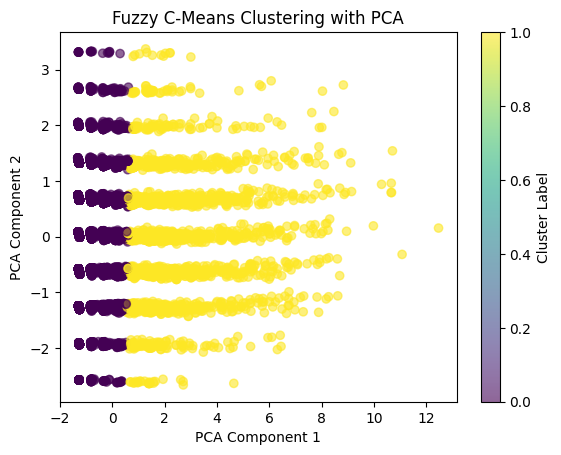

In [74]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from fcmeans import FCM  # Thư viện Fuzzy C-Means
import matplotlib.pyplot as plt

# Tiền xử lý dữ liệu (chuẩn hóa)
scaler = StandardScaler()
future_potential_data_scaled = scaler.fit_transform(future_potential_data)

# Giảm chiều dữ liệu với PCA
pca = PCA(n_components=2)  # Giảm chiều dữ liệu xuống 2 chiều
data_pca = pca.fit_transform(future_potential_data_scaled)

# Phân cụm mờ với Fuzzy C-Means
fcm = FCM(n_clusters=2)  # Chọn số cụm là 4, bạn có thể điều chỉnh
fcm.fit(data_pca)

# Lấy giá trị mức độ thuộc về cụm
membership = fcm.u  # U là ma trận mức độ thuộc về mỗi cụm

# Dự đoán các cụm
labels = fcm.predict(data_pca)

# Thêm kết quả phân cụm vào DataFrame
future_potential_data['Fuzzy_Cluster'] = labels

# Trực quan hóa kết quả phân cụm mờ
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.6)
plt.title('Fuzzy C-Means Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()



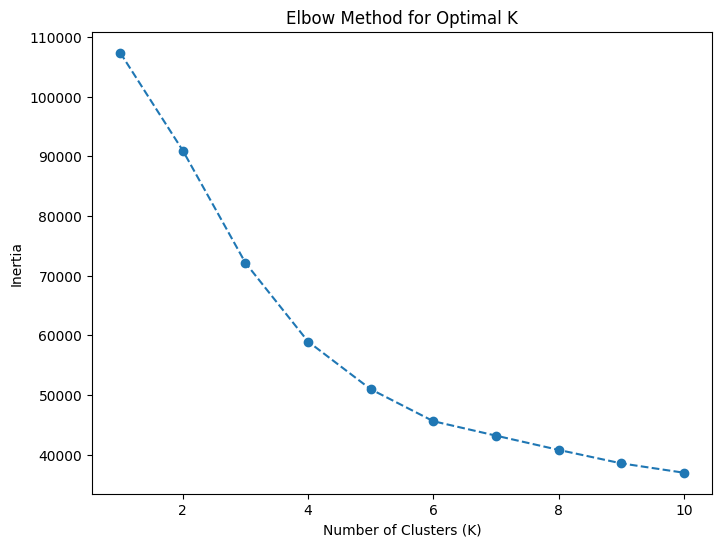

In [76]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd


# Mã hóa cột phân loại EducationField nếu cần
future_potential_data_encoded = pd.get_dummies(future_potential_data, columns=['EducationField'], drop_first=True)

# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
data_scaled = scaler.fit_transform(future_potential_data_encoded)

# Bước 1: Tìm số cụm tối ưu với Elbow Method
inertia = []
k_range = range(1, 11)  # Từ 1 đến 10 cụm để thử nghiệm

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ đồ thị Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


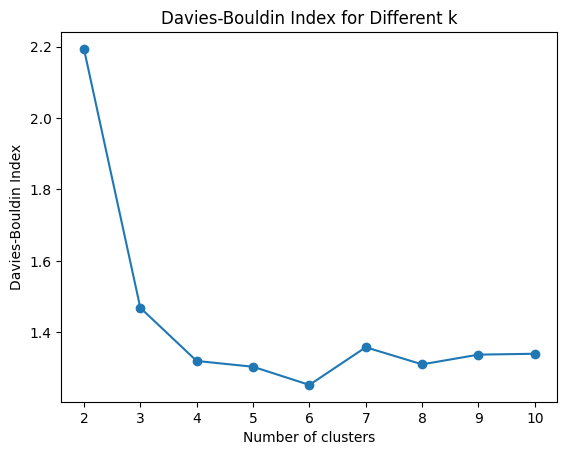

In [100]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
k_range = range(2, 11)  # Kiểm tra với k từ 2 đến 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    score = davies_bouldin_score(data_scaled, clusters)
    db_scores.append(score)

# Vẽ biểu đồ Davies-Bouldin Index
plt.plot(k_range, db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()


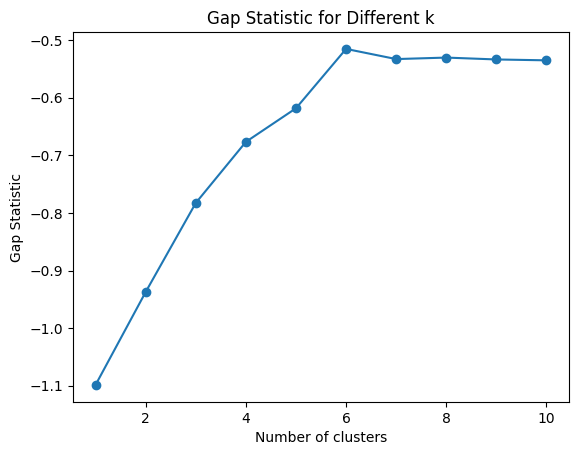

In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import numpy as np

def gap_statistic(X, k_max):
    gap_values = []
    for k in range(1, k_max+1):
        # Fit model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        # Tính toán tổng khoảng cách trong cụm
        total_dispersion = np.sum(pairwise_distances(X, kmeans.cluster_centers_, metric='euclidean') ** 2)
        
        # Tạo dữ liệu ngẫu nhiên và tính toán tổng khoảng cách cho dữ liệu ngẫu nhiên
        random_data = np.random.rand(*X.shape)
        random_dispersion = np.sum(pairwise_distances(random_data, kmeans.cluster_centers_, metric='euclidean') ** 2)
        
        gap = np.log(random_dispersion) - np.log(total_dispersion)
        gap_values.append(gap)
    
    return gap_values

gap_values = gap_statistic(data_scaled, 10)

plt.plot(range(1, 11), gap_values, marker='o')
plt.title('Gap Statistic for Different k')
plt.xlabel('Number of clusters')
plt.ylabel('Gap Statistic')
plt.show()


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/629198297.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_potential_data['KMeans_Cluster'] = clusters


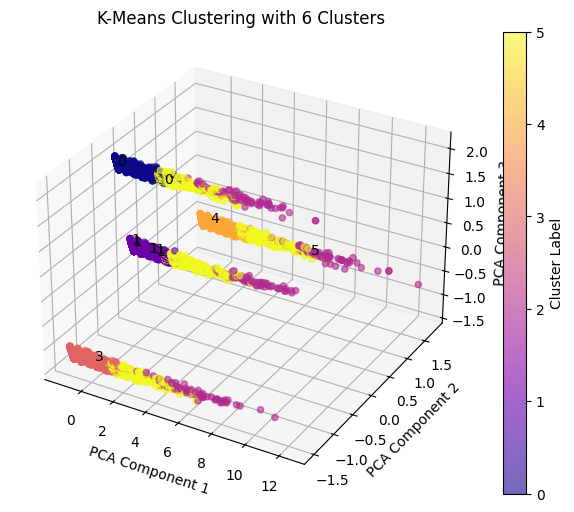

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giả sử 'data_scaled' là dữ liệu đã chuẩn hóa (standardized data)

# Thực hiện phân cụm với K-Means
optimal_k = 6  # Số cụm đã chọn từ đồ thị Elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Thêm kết quả phân cụm vào DataFrame
future_potential_data['KMeans_Cluster'] = clusters

# Giảm chiều dữ liệu với PCA để giảm xuống 3 chiều
pca = PCA(n_components=3)
pca_data = pca.fit_transform(data_scaled)

# Tạo đồ thị 3D để trực quan hóa kết quả phân cụm
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Vẽ điểm phân tán 3D với các cụm
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters, cmap='plasma', marker='o', alpha=0.6)

# Thêm tiêu đề và nhãn trục
ax.set_title(f'K-Means Clustering with {optimal_k} Clusters')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Thêm colorbar để phân biệt các cụm
plt.colorbar(scatter, label='Cluster Label')

# Hiển thị chỉ số cụm cho mỗi điểm trên biểu đồ 3D
# Cẩn thận khi thêm nhãn, có thể chỉ thêm cho một số điểm để tránh làm quá tải đồ thị
for i in range(1, len(pca_data), len(pca_data)//10):  # Hiển thị nhãn cho 10% số điểm
    ax.text(pca_data[i, 0], pca_data[i, 1], pca_data[i, 2], str(clusters[i]), size=10, color='black')

# Hiển thị đồ thị
plt.show()

# Tính toán các tính chất của từng cụm (trung bình, độ lệch chuẩn)
cluster_summary = future_potential_data.groupby('KMeans_Cluster').agg(
    {
        'YearsSinceLastPromotion': ['mean', 'std'],
        'Performance_Score': ['mean', 'std'],
        'EducationField': lambda x: x.mode()[0],  # Lấy giá trị mode (giá trị phổ biến nhất)
        'TrainingTimesLastYear': ['mean', 'std'],
        'JobLevel_updated': ['mean', 'std'],
        'YearsInCurrentRole': ['mean', 'std']
    }
)



/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/2404025528.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_potential_data['KMeans_Cluster'] = clusters


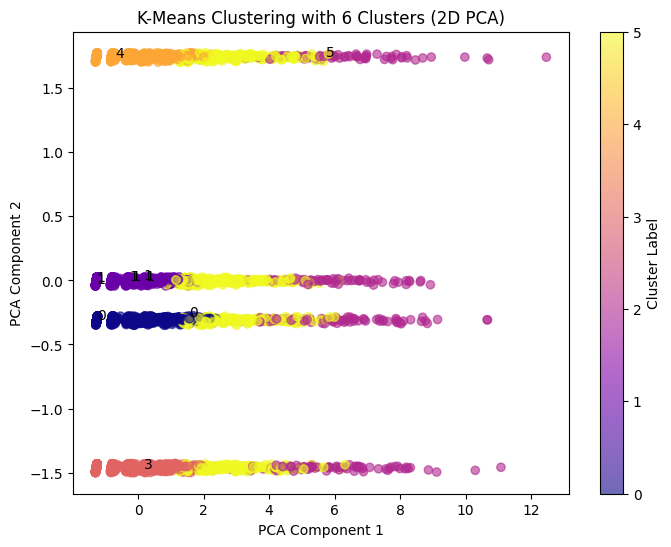

In [102]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giả sử 'data_scaled' là dữ liệu đã chuẩn hóa (standardized data)

# Thực hiện phân cụm với K-Means
optimal_k = 6  # Số cụm đã chọn từ đồ thị Elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Thêm kết quả phân cụm vào DataFrame
future_potential_data['KMeans_Cluster'] = clusters

# Giảm chiều dữ liệu với PCA xuống 2 chiều
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

# Tạo đồ thị 2D để trực quan hóa kết quả phân cụm
plt.figure(figsize=(8, 6))

# Vẽ điểm phân tán 2D với các cụm
scatter = plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='plasma', marker='o', alpha=0.6)

# Thêm tiêu đề và nhãn trục
plt.title(f'K-Means Clustering with {optimal_k} Clusters (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Thêm colorbar để phân biệt các cụm
plt.colorbar(scatter, label='Cluster Label')

# Hiển thị chỉ số cụm cho mỗi điểm trên biểu đồ 2D
# Cẩn thận khi thêm nhãn, có thể chỉ thêm cho một số điểm để tránh làm quá tải đồ thị
for i in range(1, len(pca_data), len(pca_data)//10):  # Hiển thị nhãn cho 10% số điểm
    plt.text(pca_data[i, 0], pca_data[i, 1], str(clusters[i]), size=10, color='black')

# Hiển thị đồ thị
plt.show()

# Tính toán các tính chất của từng cụm (trung bình, độ lệch chuẩn)
cluster_summary = future_potential_data.groupby('KMeans_Cluster').agg(
    {
        'YearsSinceLastPromotion': ['mean', 'std'],
        'Performance_Score': ['mean', 'std'],
        'EducationField': lambda x: x.mode()[0],  # Lấy giá trị mode (giá trị phổ biến nhất)
        'TrainingTimesLastYear': ['mean', 'std'],
        'JobLevel_updated': ['mean', 'std'],
        'YearsInCurrentRole': ['mean', 'std']
    }
)


In [103]:
cluster_summary

YearsSinceLastPromotion           Performance_Score  \
                                  mean       std              mean   
KMeans_Cluster                                                       
0                             1.172852  0.434842       3631.105842   
1                             1.126320  0.354539       2949.574809   
2                             2.860927  1.538173     134800.016556   
3                             1.158198  0.405453       3523.389905   
4                             1.168948  0.420147       3368.798331   
5                             2.932103  0.986053      25298.124588   

                             EducationField TrainingTimesLastYear            \
                         std       <lambda>                  mean       std   
KMeans_Cluster                                                                
0                7258.899351              3              2.481787  1.044315   
1                5783.246093              0              2.467783  1.099874   
2               50999.689219              3              2.605960  1.037678   
3                6921.674769              1              2.441734  1.092158   
4                6364.257423              2              2.430384  1.025760   
5               19173.221080              0              2.420567  1.105777   

               JobLevel_updated           YearsInCurrentRole            
                           mean       std               mean       std  
KMeans_Cluster                                                          
0                      0.728866  0.930569           1.674227  0.832720  
1                      0.668365  0.867996           1.629778  0.791084  
2                      4.321192  0.794174           3.678808  1.252034  
3                      0.699864  0.879003           1.668022  0.834015  
4                      0.707179  0.886361           1.680134  0.833814  
5                      2.217535  1.114256           3.344759  0.955021

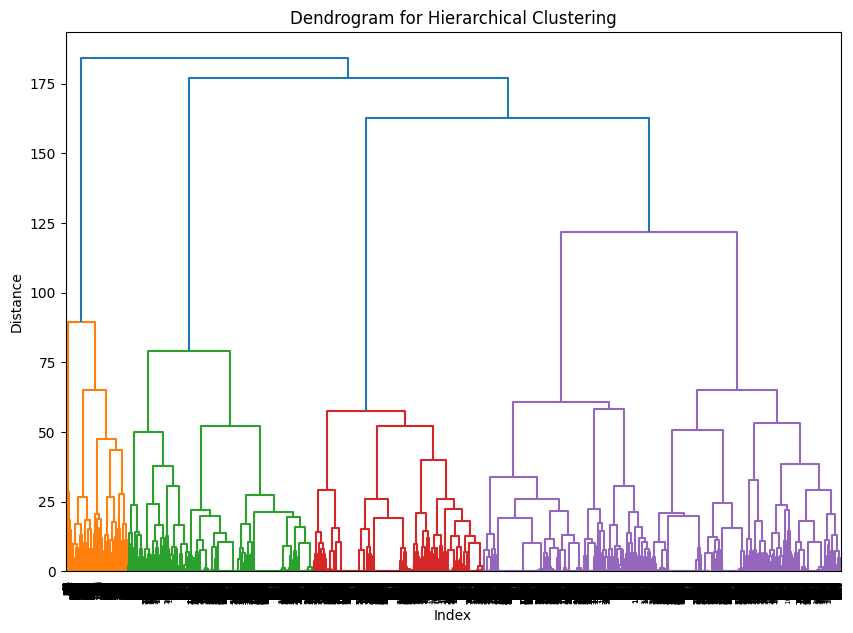

In [82]:
# Mã hóa cột phân loại EducationField nếu cần
future_potential_data_encoded = pd.get_dummies(future_potential_data, columns=['EducationField'], drop_first=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
data_scaled = scaler.fit_transform(future_potential_data_encoded)

# Bước 1: Tạo cây phân cụm Hierarchical với phương pháp Agglomerative
Z = linkage(data_scaled, method='ward')  # 'ward' là phương pháp tối thiểu hóa tổng sai số

# Bước 2: Vẽ Dendrogram để tìm số cụm tối ưu
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

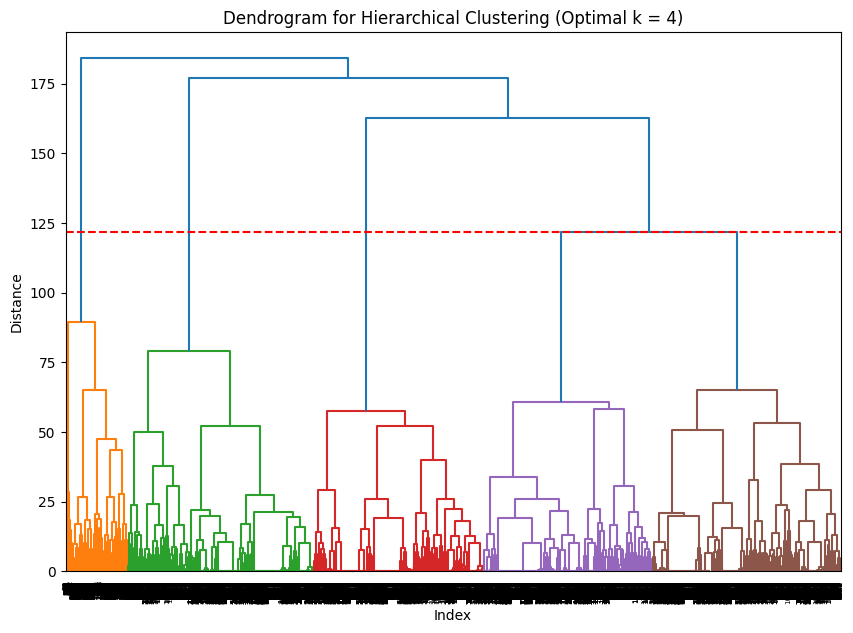

   YearsSinceLastPromotion  Performance_Score  EducationField  \
0                        5              41328               2   
1                        5              47700               2   
2                        1             145680               2   
3                        5              50310               1   
4                        5              37620               1   

   Hierarchical_Cluster  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  


/var/folders/c2/zqjzltfn0lq_by9xz6b6pr9h0000gp/T/ipykernel_93398/3483345930.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future_potential_data['Hierarchical_Cluster'] = clusters


In [87]:
# Thêm số cụm tối ưu vào cây (cắt cây tại số cụm tối ưu)
optimal_k = 4  # Số cụm bạn muốn (ví dụ là 4)
clusters = fcluster(Z, t=optimal_k, criterion='maxclust')

# Vẽ lại Dendrogram và đánh dấu số cụm
plt.figure(figsize=(10, 7))
dendrogram(Z, color_threshold=Z[-optimal_k, 2])  # Chọn màu cho các nhánh
plt.axhline(y=Z[-optimal_k, 2], color='r', linestyle='--')  # Vẽ đường cắt cây tại số cụm tối ưu
plt.title(f'Dendrogram for Hierarchical Clustering (Optimal k = {optimal_k})')
plt.xlabel('Index')
plt.ylabel('Distance')

# Hiển thị biểu đồ
plt.show()

# Kiểm tra kết quả phân cụm
future_potential_data['Hierarchical_Cluster'] = clusters
print(future_potential_data[['YearsSinceLastPromotion', 'Performance_Score', 'EducationField', 'Hierarchical_Cluster']].head())

In [90]:
# Hiển thị tính chất của các cụm sau khi phân cụm Hierarchical
# Tính toán các tính chất của các cụm: trung bình và độ lệch chuẩn cho từng thuộc tính

cluster_summary = future_potential_data.groupby('Hierarchical_Cluster').agg(
    {
        'YearsSinceLastPromotion': ['mean', 'std'],
        'Performance_Score': ['mean', 'std'],
        'EducationField': lambda x: x.mode()[0],  # Lấy giá trị mode (giá trị phổ biến nhất)
        'TrainingTimesLastYear': ['mean', 'std'],
        'JobLevel_updated': ['mean', 'std'],
        'YearsInCurrentRole': ['mean', 'std']
    }
)

# Hiển thị bảng tổng kết tính chất của các cụm
cluster_summary

YearsSinceLastPromotion           Performance_Score  \
                                        mean       std              mean   
Hierarchical_Cluster                                                       
1                                   3.049678  1.185128      59097.875805   
2                                   1.360472  0.763207       5690.350528   
3                                   1.145238  0.385596       3777.578571   
4                                   1.242959  0.546719       3980.161541   

                                   EducationField TrainingTimesLastYear  \
                               std       <lambda>                  mean   
Hierarchical_Cluster                                                      
1                     56759.720632              1              2.411224   
2                     10988.077330              3              2.481355   
3                      7702.680377              1              2.451701   
4                      7391.142815              2              2.449498   

                               JobLevel_updated           YearsInCurrentRole  \
                           std             mean       std               mean   
Hierarchical_Cluster                                                           
1                     1.024193         2.992640  1.342718           3.467341   
2                     1.051869         0.866066  1.030356           1.818832   
3                     1.094411         0.713265  0.896343           1.673469   
4                     1.074582         0.756394  0.917018           1.772095   

                                
                           std  
Hierarchical_Cluster            
1                     1.082504  
2                     0.951641  
3                     0.866473  
4                     0.914254